# Customer Attrition

Customer attrition or customer churn, customer turnover, or customer defection, is the loss of clients.

Telephone service companies, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.



In [1]:
# importing libraries
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## Data Overview

In [3]:
print('Rows     :', df.shape[0])
print('Columns  :', df.shape[1])
print('\n Features : \n', df.columns.tolist())
print('\n Missing values: \n', df.isnull().sum().values.sum())
print('\n Unique values: \n', df.nunique())

Rows     : 7043
Columns  : 21

 Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

 Missing values: 
 0

 Unique values: 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## Data Manipulation

In [4]:
#replacing space with null in TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
#dropping columns containing null values in TotalCharges
df = df[df['TotalCharges'].notnull()]
df = df.reset_index()[df.columns]
df.TotalCharges = df.TotalCharges.astype(float)

In [5]:
#replace 'No internet service' to No 
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No'})

#replace values
df.SeniorCitizen = df.SeniorCitizen.replace({1:'Yes', 0:'No'})

bins = [0,12,24,48, 60, 90]
bin_labels = ['Tenure_0-12','Tenure_12-24','Tenure_24-48', 'Tenure_48-60', 'Tenure_gt_60']

#create a new attribute `age_group`:
df['tenure_group'] = pd.cut(df.tenure, bins, right=False, labels = bin_labels)


In [6]:
df.SeniorCitizen.value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

In [7]:
#separating churn and non-churn 
churn = df[df['Churn'] == 'Yes']
not_churn = df[df['Churn'] == 'No']

In [8]:
#separating categorical and numerical columns
id_col = ['customerID']
label = ['Churn']


In [9]:
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in label]
num_cols = [x for x in df.columns if x not in cat_cols + id_col + label]

## Exploratory Data Analysis

<BarContainer object of 2 artists>

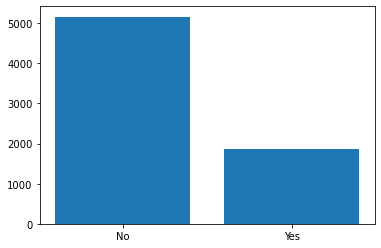

In [10]:
from plotly.subplots import make_subplots
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

#labels
lab = df['Churn'].value_counts().keys().tolist()
#values
val = df['Churn'].value_counts().values.tolist()
plt.bar(lab, val)


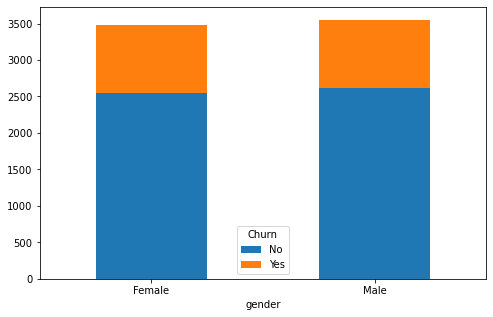

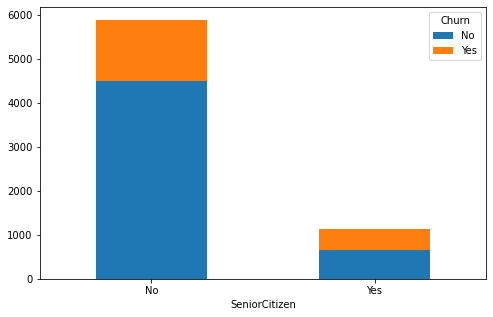

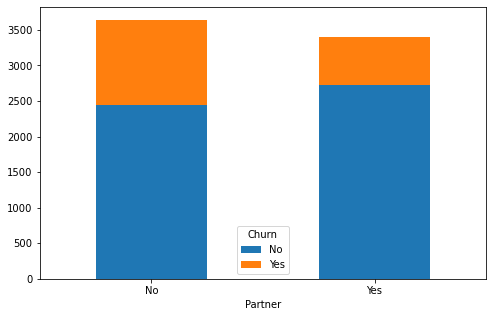

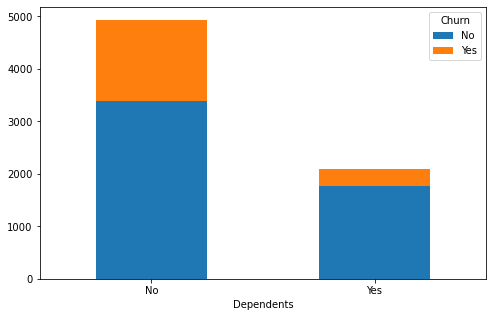

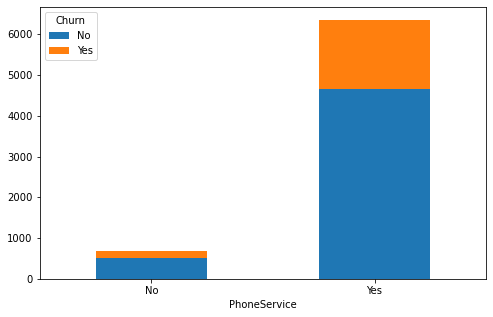

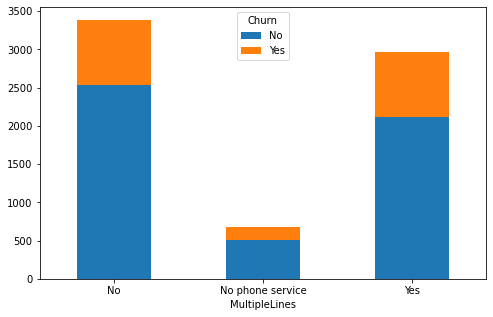

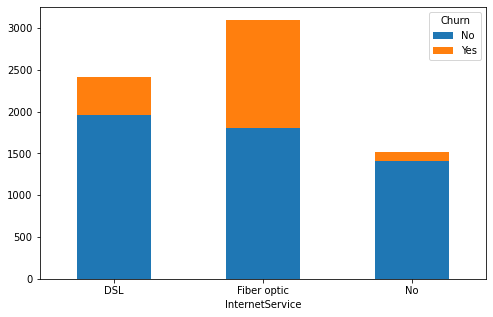

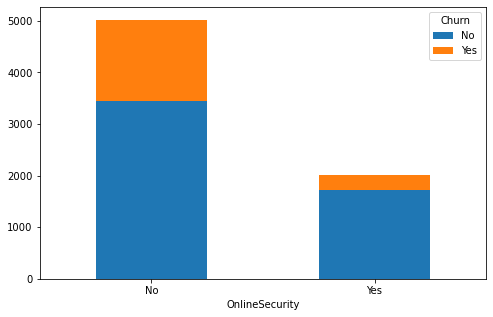

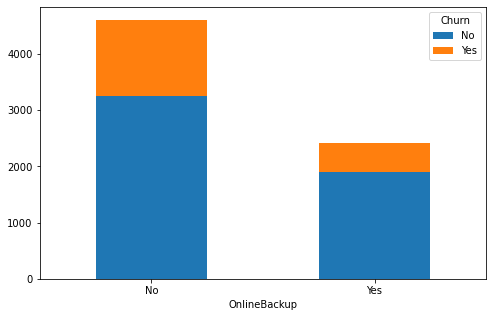

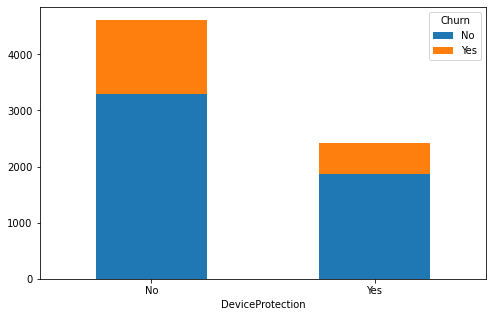

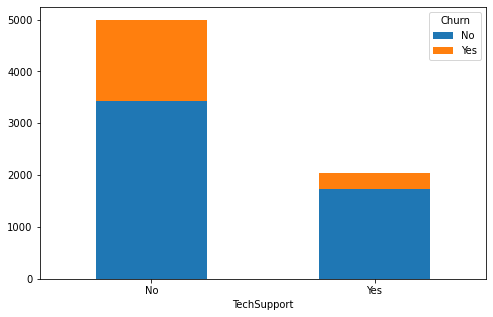

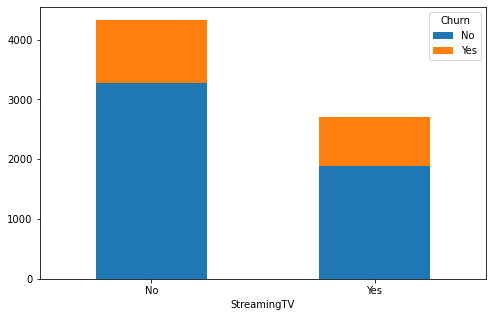

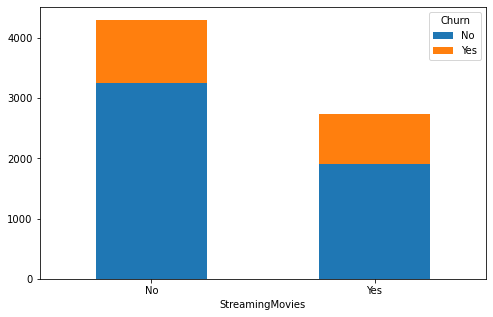

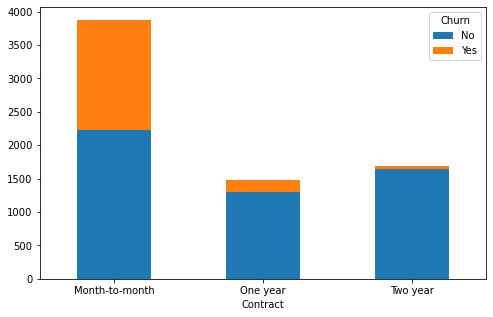

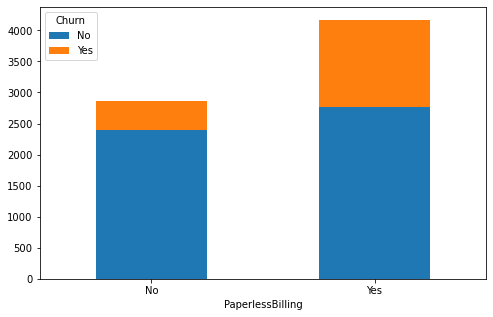

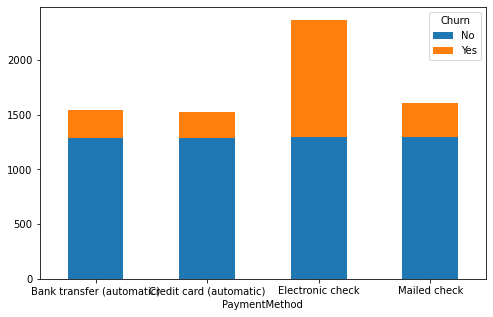

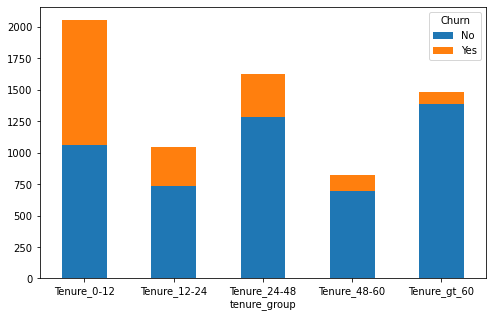

In [11]:
# Stacked bar plot
for col in cat_cols:  
    ct_df = pd.crosstab(df[col],df['Churn'])
    ct_df.plot(kind='bar', stacked=True, rot = 0, figsize=(8, 5));

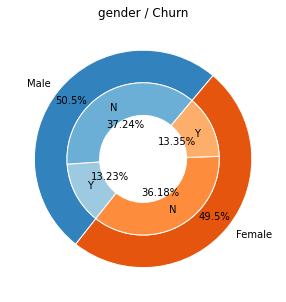

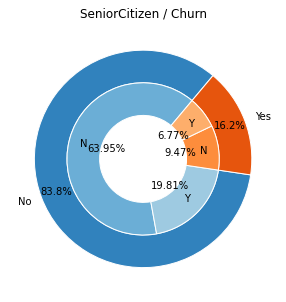

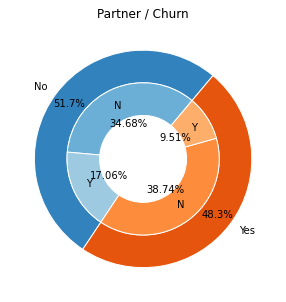

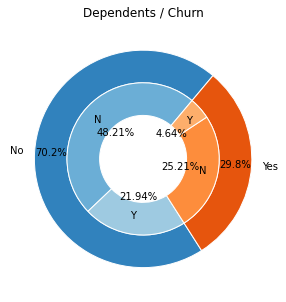

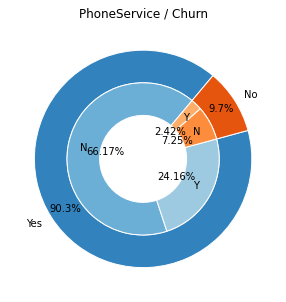

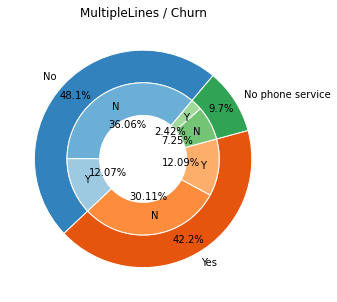

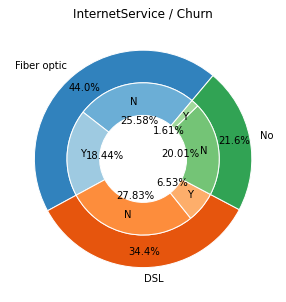

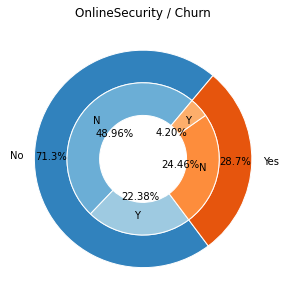

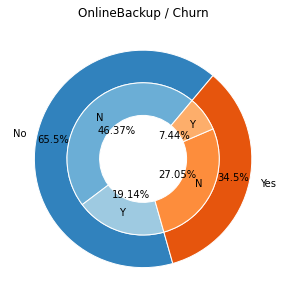

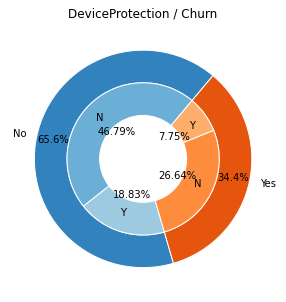

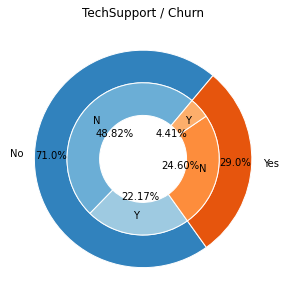

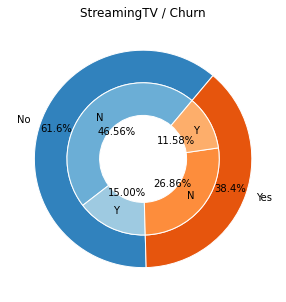

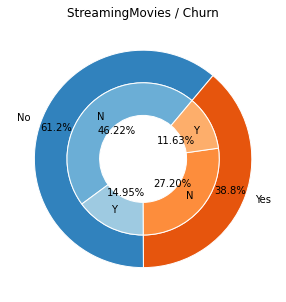

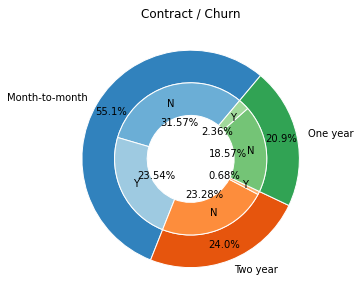

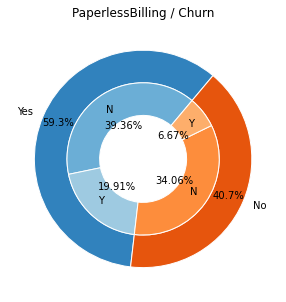

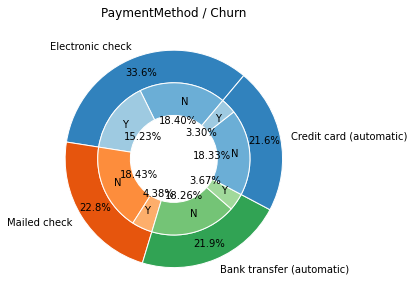

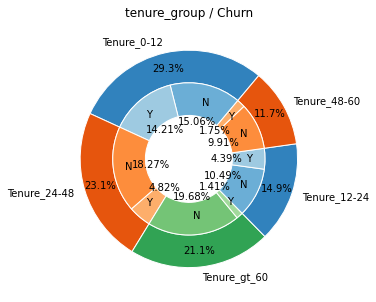

In [12]:
for col in cat_cols:  
    out_vals = df[col].value_counts()
    in_vals = np.array([df[df[col]==x]['Churn'].value_counts() for x in out_vals.index]).flatten()

    fig, ax = plt.subplots(figsize=(5,5))

    size = 0.3
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(3)*4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))


    ax.pie(out_vals, radius=1, colors=outer_colors, autopct='%.1f%%', pctdistance=0.85,
       wedgeprops=dict(width=size, edgecolor='w'),labels=out_vals.index,
       textprops={'fontsize': 10}, startangle=50)

    ax.pie(in_vals, radius=1-size, colors=inner_colors, autopct='%.2f%%',pctdistance=0.5, 
       wedgeprops=dict(width=size, edgecolor='w'), labels=['N', 'Y']*len(out_vals),
       labeldistance=0.75, textprops={'fontsize': 10}, startangle=50)
    
    
    
    ax.set(aspect="equal")
    title = col + ' / Churn'
    plt.title(title, fontsize=12)
    plt.show()

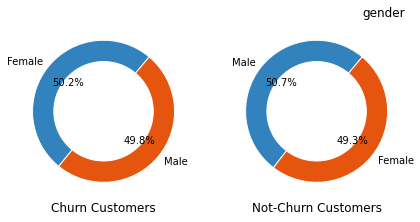

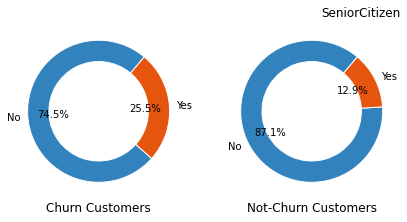

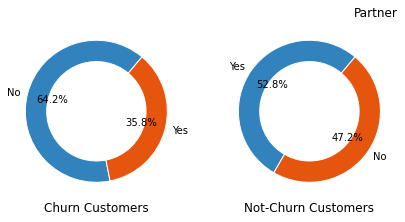

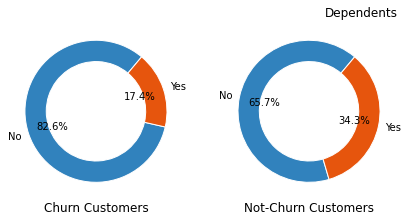

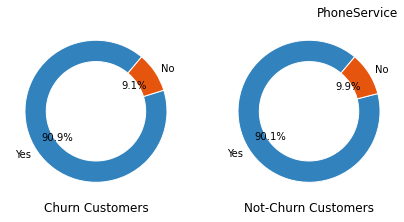

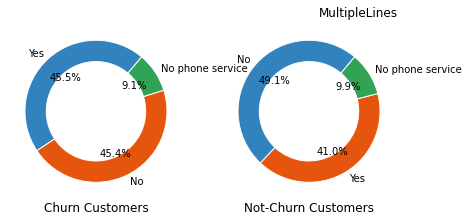

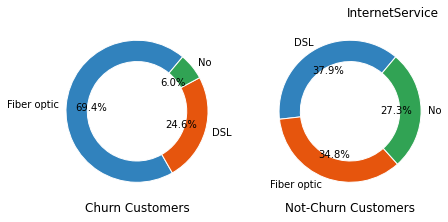

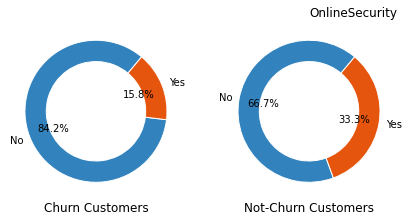

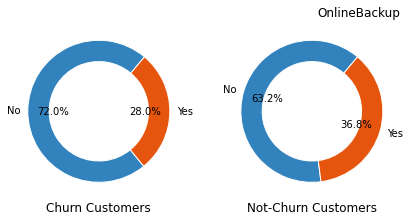

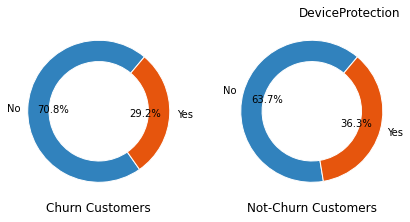

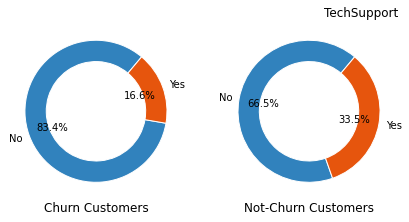

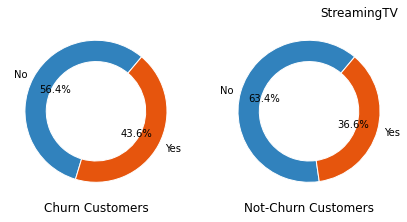

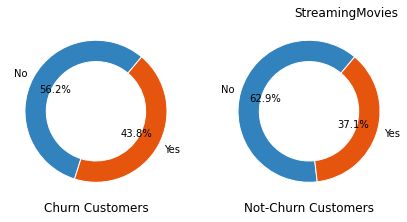

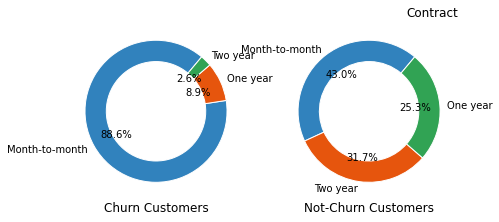

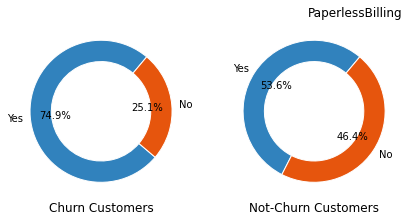

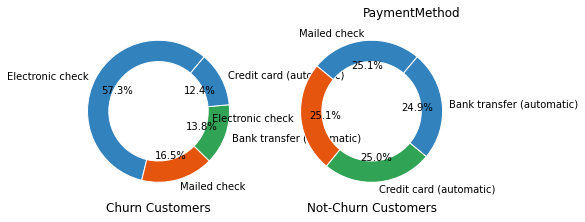

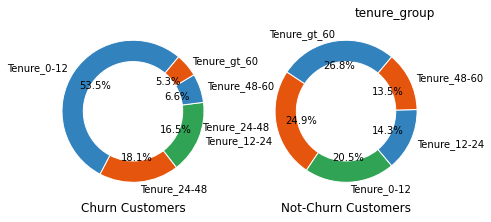

In [13]:
for col in cat_cols:
    churn_pie = churn[col].value_counts()
    non_churn_pie = not_churn[col].value_counts()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,7))

    
    cmap = plt.get_cmap("tab20c")
    colors = cmap(np.arange(3)*4)
    
    ax1.pie(churn_pie, radius=1, colors=colors, autopct='%.1f%%', pctdistance=0.65,
       wedgeprops=dict(width=size, edgecolor='w'),labels=churn_pie.index,
       textprops={'fontsize': 10}, startangle=50)

    ax2.pie(non_churn_pie, radius=1, colors=colors, autopct='%.1f%%',pctdistance=0.65, 
       wedgeprops=dict(width=size, edgecolor='w'), labels=non_churn_pie.index,
       textprops={'fontsize': 10}, startangle=50)
  
  
    
    ax1.set(aspect="equal")
    #title = col + ' / Churn'
    ax1.set_title('Churn Customers', y = -0.1)
    ax2.set_title('Not-Churn Customers', y = -0.1)
    plt.title(col, fontsize=12, loc='right')
    fig.subplots_adjust(hspace = 0.8)
    plt.show()

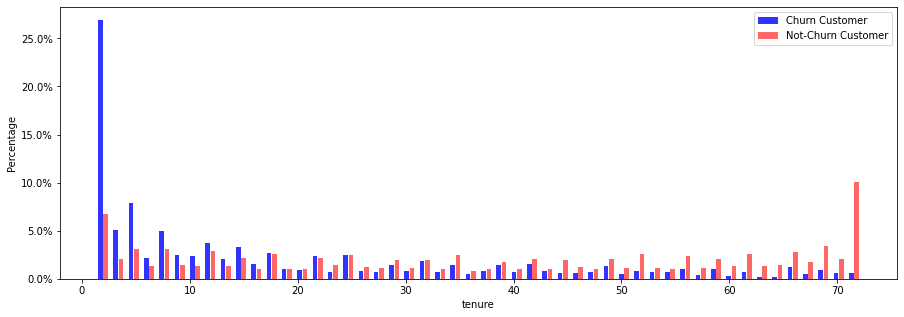

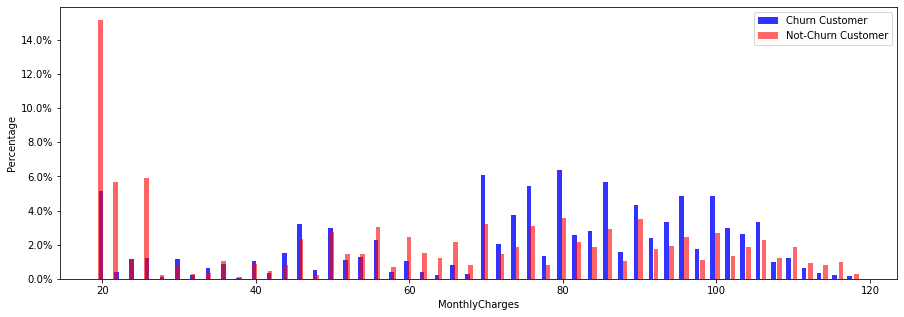

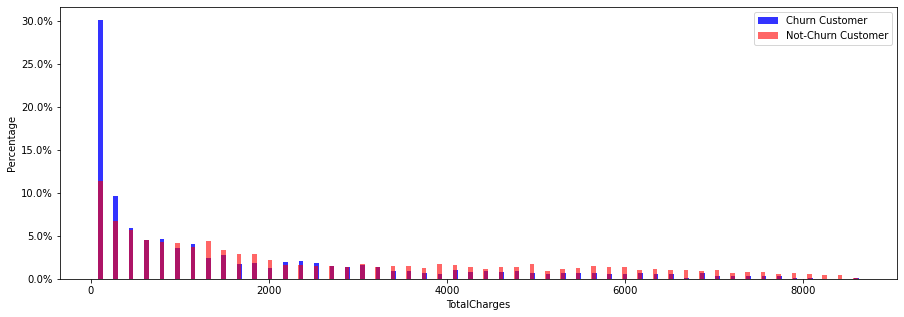

In [14]:
from matplotlib.ticker import PercentFormatter
for col in num_cols:
    
    width = 0.5
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.hist(x = churn[col], weights=np.ones(len(churn[col])) / len(churn[col]), align='mid', bins=50, rwidth=0.3,
            color = 'blue', alpha = 0.8, label='Churn Customer')
    ax.hist(x= not_churn[col]+ width, weights=np.ones(len(not_churn[col]+ width)) / len(not_churn[col]+ width), bins=50, 
            rwidth=0.3, align='mid',color = 'red',alpha= 0.6, label='Not-Churn Customer')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.legend()
    plt.show()

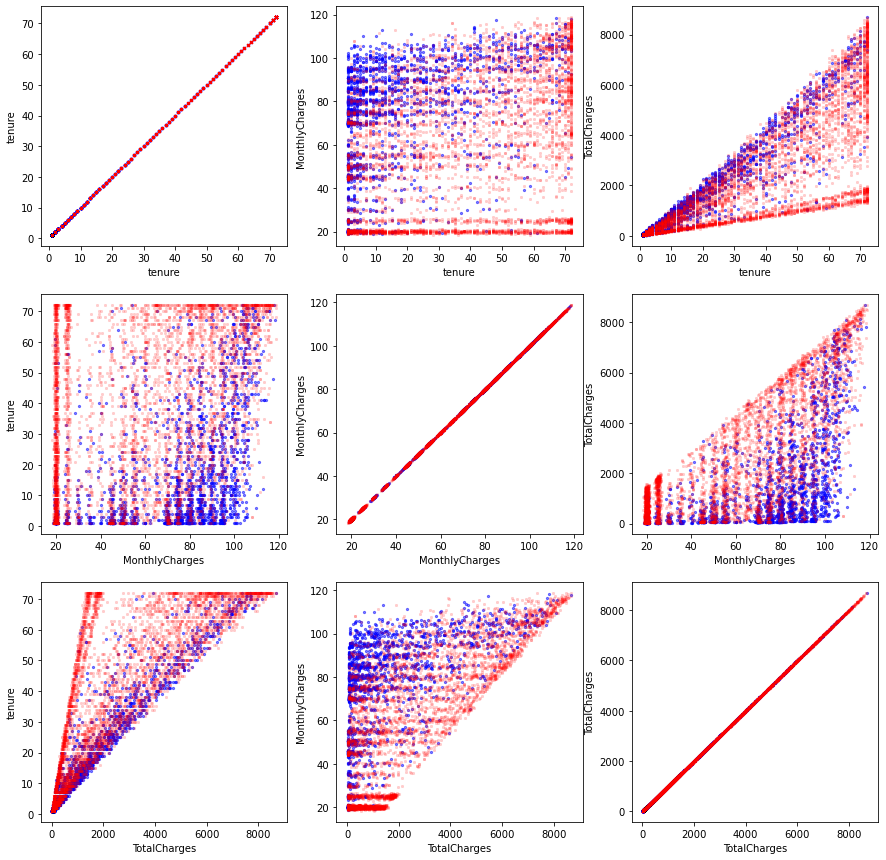

In [15]:
x_list = churn[num_cols]
y_list = not_churn[num_cols]
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(x_list.columns)):
    for j in range(len(y_list.columns)):
        plot_num= 331+((3* i) + j)
        ax1 = fig.add_subplot(plot_num)
        plt.scatter(x_list.iloc[:,i].values, x_list.iloc[:,j].values, marker='o',color='blue', alpha = 0.5, s = 5)
        plt.scatter(y_list.iloc[:,i].values, y_list.iloc[:,j].values, marker='x',color='red',alpha = 0.2, s = 5)
        plt.xlabel(x_list.columns[i])
        plt.ylabel(x_list.columns[j])

### Customer churn in tenure groups

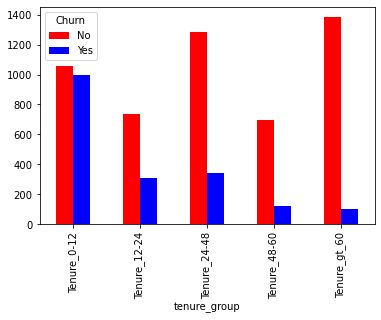

In [16]:
churn_ten = df.groupby(['Churn', 'tenure_group']).size().reset_index()
churn_ten = churn_ten.pivot(index='tenure_group', columns = 'Churn', values = 0)
ax = churn_ten.plot.bar(rot=90, color = ['red','blue'])

### Monthly Charges and Total Charges by Tenure and Churn groups

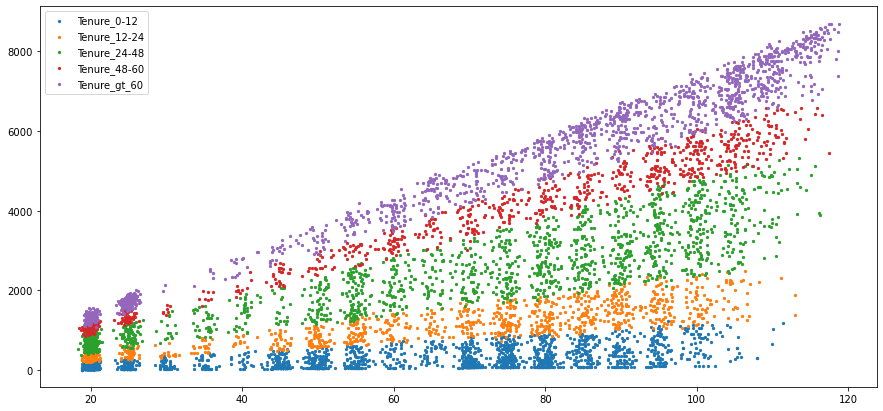

In [17]:
ten_groups = df.groupby('tenure_group')
plt.figure(figsize=(15,7))
for group in ten_groups.groups:
    plt.scatter(ten_groups.get_group(group)['MonthlyCharges'].values, ten_groups.get_group(group)['TotalCharges'].values, 
                s = 5, label= group )
plt.legend()

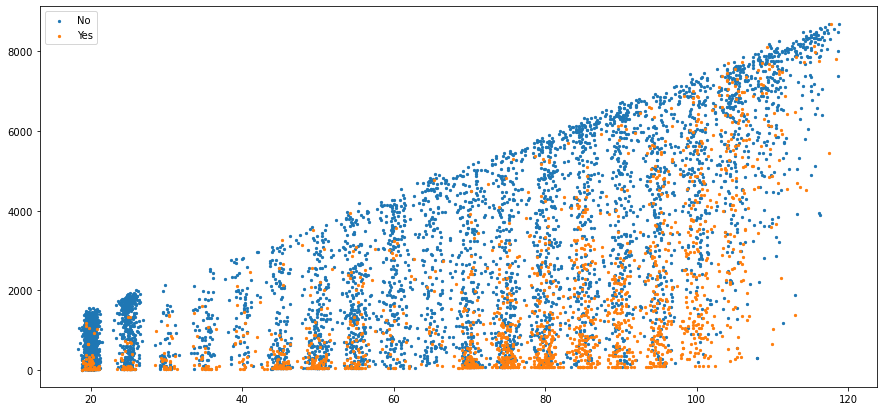

In [18]:
ch_groups = df.groupby('Churn')
plt.figure(figsize=(15,7))
for group in ch_groups.groups:
    plt.scatter(ch_groups.get_group(group)['MonthlyCharges'].values, ch_groups.get_group(group)['TotalCharges'].values, 
                s = 5, label= group)
plt.legend()

### Average Charges by tenure groups

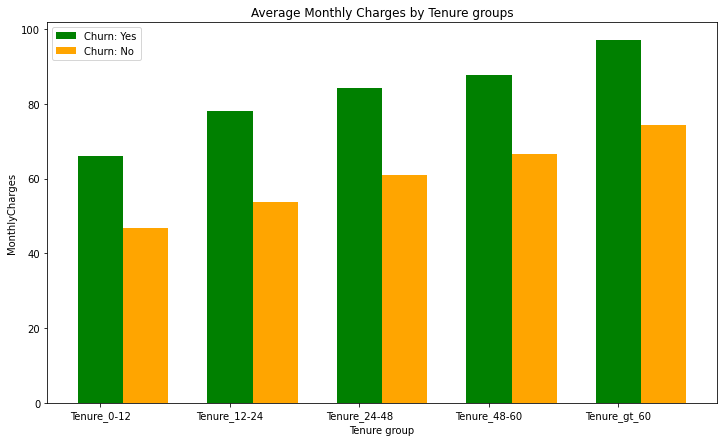

In [19]:
avg_ten_ch = churn.groupby('tenure_group')[['MonthlyCharges', 'TotalCharges']].mean().reset_index()
avg_ten_nch = not_churn.groupby('tenure_group')[['MonthlyCharges', 'TotalCharges']].mean().reset_index()
ind = np.array(range(len(avg_ten_ch)))

width = 0.35        # width of the bar
fig, ax = plt.subplots(figsize=(12, 7)) 

prodAchart = ax.bar(ind, avg_ten_ch['MonthlyCharges'], width, color='green', align='center',label = 'Churn: Yes')
prodBchart = ax.bar(ind+width, avg_ten_nch['MonthlyCharges'], width, color='orange',align='center', label = 'Churn: No')

ax.set(title = 'Average Monthly Charges by Tenure groups')
ax.set_xlabel('Tenure group')
ax.set_ylabel('MonthlyCharges')

plt.legend()
plt.xticks(np.arange(0,5), ['Tenure_0-12', 'Tenure_12-24', 'Tenure_24-48', 'Tenure_48-60', 'Tenure_gt_60'])
plt.show()


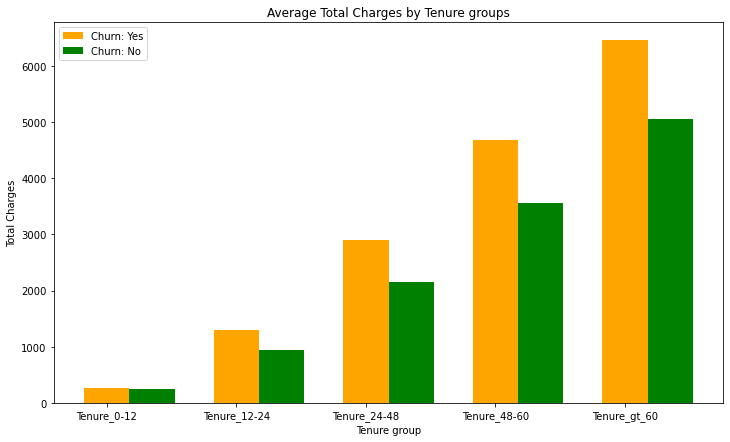

In [20]:
fig, ax = plt.subplots(figsize=(12, 7)) 

prodAchart = ax.bar(ind, avg_ten_ch['TotalCharges'], width, color='orange', align='center',label = 'Churn: Yes')
prodBchart = ax.bar(ind+width, avg_ten_nch['TotalCharges'], width, color='green',align='center', label = 'Churn: No')

ax.set(title = 'Average Total Charges by Tenure groups')
ax.set_xlabel('Tenure group')
ax.set_ylabel('Total Charges')

plt.legend()
plt.xticks(np.arange(0,5), ['Tenure_0-12', 'Tenure_12-24', 'Tenure_24-48', 'Tenure_48-60', 'Tenure_gt_60'])
plt.show()


### Data preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

id_col = ['customerID']
label = ['Churn']

#categorical columns
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in label]
#numerical columns
num_cols = [x for x in df.columns if x not in cat_cols + label + id_col]

#binary columns
bin_cols = df.nunique()[df.nunique()==2].keys().tolist()

#columns more than 2 values
multi_cols = [x for x in cat_cols if x not in bin_cols]

#encoding binary columns
lbl = LabelEncoder()
for col in bin_cols:
    df[col] = lbl.fit_transform(df[col])

#duplicating columns for multi value columns
df = pd.get_dummies(data = df, columns=multi_cols)    

In [22]:
#scaling numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

In [23]:
#dropping original values and merging scaled values for numerical columns
df_og = df.copy()
df = df.drop(columns=num_cols, axis=1)
df = df.merge(scaled, left_index = True, right_index = True, how= 'left')

In [24]:
df.describe()

gender  SeniorCitizen      Partner   Dependents  PhoneService  \
count  7032.000000    7032.000000  7032.000000  7032.000000   7032.000000   
mean      0.504693       0.162400     0.482509     0.298493      0.903299   
std       0.500014       0.368844     0.499729     0.457629      0.295571   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     0.000000      1.000000   
50%       1.000000       0.000000     0.000000     0.000000      1.000000   
75%       1.000000       0.000000     1.000000     1.000000      1.000000   
max       1.000000       1.000000     1.000000     1.000000      1.000000   

       OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
count     7032.000000   7032.000000       7032.000000  7032.000000   
mean         0.286547      0.344852          0.343857     0.290102   
std          0.452180      0.475354          0.475028     0.453842   
min          0.000000      0.000000          0.000000     0.000000   
25%          0.000000      0.000000          0.000000     0.000000   
50%          0.000000      0.000000          0.000000     0.000000   
75%          1.000000      1.000000          1.000000     1.000000   
max          1.000000      1.000000          1.000000     1.000000   

       StreamingTV  ...  PaymentMethod_Electronic check  \
count  7032.000000  ...                     7032.000000   
mean      0.384386  ...                        0.336320   
std       0.486484  ...                        0.472483   
min       0.000000  ...                        0.000000   
25%       0.000000  ...                        0.000000   
50%       0.000000  ...                        0.000000   
75%       1.000000  ...                        1.000000   
max       1.000000  ...                        1.000000   

       PaymentMethod_Mailed check  tenure_group_Tenure_0-12  \
count                 7032.000000               7032.000000   
mean                     0.228100                  0.292662   
std                      0.419637                  0.455017   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      0.000000                  0.000000   
75%                      0.000000                  1.000000   
max                      1.000000                  1.000000   

       tenure_group_Tenure_12-24  tenure_group_Tenure_24-48  \
count                7032.000000                7032.000000   
mean                    0.148891                   0.230944   
std                     0.356006                   0.421467   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     1.000000                   1.000000   

       tenure_group_Tenure_48-60  tenure_group_Tenure_gt_60        tenure  \
count                7032.000000                7032.000000  7.032000e+03   
mean                    0.116610                   0.210893 -1.126643e-16   
std                     0.320978                   0.407972  1.000071e+00   
min                     0.000000                   0.000000 -1.280248e+00   
25%                     0.000000                   0.000000 -9.542963e-01   
50%                     0.000000                   0.000000 -1.394171e-01   
75%                     0.000000                   0.000000  9.199259e-01   
max                     1.000000                   1.000000  1.612573e+00   

       MonthlyCharges  TotalCharges  
count    7.032000e+03  7.032000e+03  
mean     6.062651e-17 -1.119064e-16  
std      1.000071e+00  1.000071e+00  
min     -1.547283e+00 -9.990692e-01  
25%     -9.709769e-01 -8.302488e-01  
50%      1.845440e-01 -3.908151e-01  
75%      8.331482e-01  6.668271e-01  
max      1.793381e+00

### Variable Summary

In [25]:
summary = df_og[[x for x in df_og.columns if x not in id_col]].\
describe().transpose().reset_index()
summary = summary.rename(columns = {'index': 'feature'})
summary = np.around(summary, 3)
summary

feature   count      mean       std  \
0                                    gender  7032.0     0.505     0.500   
1                             SeniorCitizen  7032.0     0.162     0.369   
2                                   Partner  7032.0     0.483     0.500   
3                                Dependents  7032.0     0.298     0.458   
4                                    tenure  7032.0    32.422    24.545   
5                              PhoneService  7032.0     0.903     0.296   
6                            OnlineSecurity  7032.0     0.287     0.452   
7                              OnlineBackup  7032.0     0.345     0.475   
8                          DeviceProtection  7032.0     0.344     0.475   
9                               TechSupport  7032.0     0.290     0.454   
10                              StreamingTV  7032.0     0.384     0.486   
11                          StreamingMovies  7032.0     0.388     0.487   
12                         PaperlessBilling  7032.0     0.593     0.491   
13                           MonthlyCharges  7032.0    64.798    30.086   
14                             TotalCharges  7032.0  2283.300  2266.771   
15                                    Churn  7032.0     0.266     0.442   
16                         MultipleLines_No  7032.0     0.481     0.500   
17           MultipleLines_No phone service  7032.0     0.097     0.296   
18                        MultipleLines_Yes  7032.0     0.422     0.494   
19                      InternetService_DSL  7032.0     0.344     0.475   
20              InternetService_Fiber optic  7032.0     0.440     0.496   
21                       InternetService_No  7032.0     0.216     0.412   
22                  Contract_Month-to-month  7032.0     0.551     0.497   
23                        Contract_One year  7032.0     0.209     0.407   
24                        Contract_Two year  7032.0     0.240     0.427   
25  PaymentMethod_Bank transfer (automatic)  7032.0     0.219     0.414   
26    PaymentMethod_Credit card (automatic)  7032.0     0.216     0.412   
27           PaymentMethod_Electronic check  7032.0     0.336     0.472   
28               PaymentMethod_Mailed check  7032.0     0.228     0.420   
29                 tenure_group_Tenure_0-12  7032.0     0.293     0.455   
30                tenure_group_Tenure_12-24  7032.0     0.149     0.356   
31                tenure_group_Tenure_24-48  7032.0     0.231     0.421   
32                tenure_group_Tenure_48-60  7032.0     0.117     0.321   
33                tenure_group_Tenure_gt_60  7032.0     0.211     0.408   

      min      25%       50%       75%      max  
0    0.00    0.000     1.000     1.000     1.00  
1    0.00    0.000     0.000     0.000     1.00  
2    0.00    0.000     0.000     1.000     1.00  
3    0.00    0.000     0.000     1.000     1.00  
4    1.00    9.000    29.000    55.000    72.00  
5    0.00    1.000     1.000     1.000     1.00  
6    0.00    0.000     0.000     1.000     1.00  
7    0.00    0.000     0.000     1.000     1.00  
8    0.00    0.000     0.000     1.000     1.00  
9    0.00    0.000     0.000     1.000     1.00  
10   0.00    0.000     0.000     1.000     1.00  
11   0.00    0.000     0.000     1.000     1.00  
12   0.00    0.000     1.000     1.000     1.00  
13  18.25   35.588    70.350    89.862   118.75  
14  18.80  401.450  1397.475  3794.738  8684.80  
15   0.00    0.000     0.000     1.000     1.00  
16   0.00    0.000     0.000     1.000     1.00  
17   0.00    0.000     0.000     0.000     1.00  
18   0.00    0.000     0.000     1.000     1.00  
19   0.00    0.000     0.000     1.000     1.00  
20   0.00    0.000     0.000     1.000     1.00  
21   0.00    0.000     0.000     0.000     1.00  
22   0.00    0.000     1.000     1.000     1.00  
23   0.00    0.000     0.000     0.000     1.00  
24   0.00    0.000     0.000     0.000     1.00  
25   0.00    0.000     0.000     0.000     1.00  
26   0.00    0.000     0.000     0.000     1.00  
27   0.00 

### Correlation

gender  SeniorCitizen   Partner  \
gender                                   1.000000      -0.001819 -0.001379   
SeniorCitizen                           -0.001819       1.000000  0.016957   
Partner                                 -0.001379       0.016957  1.000000   
Dependents                               0.010349      -0.210550  0.452269   
PhoneService                            -0.007515       0.008392  0.018397   
OnlineSecurity                          -0.016328      -0.038576  0.143346   
OnlineBackup                            -0.013093       0.066663  0.141849   
DeviceProtection                        -0.000807       0.059514  0.153556   
TechSupport                             -0.008507      -0.060577  0.120206   
StreamingTV                             -0.007124       0.105445  0.124483   
StreamingMovies                         -0.010105       0.119842  0.118108   
PaperlessBilling                        -0.011902       0.156258 -0.013957   
Churn                                   -0.008545       0.150541 -0.149982   
MultipleLines_No                         0.004335      -0.136377 -0.130028   
MultipleLines_No phone service           0.007515      -0.008392 -0.018397   
MultipleLines_Yes                       -0.008883       0.142996  0.142561   
InternetService_DSL                      0.007584      -0.108276 -0.001043   
InternetService_Fiber optic             -0.011189       0.254923  0.001235   
InternetService_No                       0.004745      -0.182519 -0.000286   
Contract_Month-to-month                 -0.003251       0.137752 -0.280202   
Contract_One year                        0.007755      -0.046491  0.083067   
Contract_Two year                       -0.003603      -0.116205  0.247334   
PaymentMethod_Bank transfer (automatic) -0.015973      -0.016235  0.111406   
PaymentMethod_Credit card (automatic)    0.001632      -0.024359  0.082327   
PaymentMethod_Electronic check           0.000844       0.171322 -0.083207   
PaymentMethod_Mailed check               0.013199      -0.152987 -0.096948   
tenure_group_Tenure_0-12                 0.002089      -0.021373 -0.298986   
tenure_group_Tenure_12-24               -0.011516      -0.007618 -0.064105   
tenure_group_Tenure_24-48                0.002955       0.024027  0.025935   
tenure_group_Tenure_48-60               -0.014044       0.007006  0.098727   
tenure_group_Tenure_gt_60                0.015716       0.000151  0.284935   
tenure                                   0.005285       0.015683  0.381912   
MonthlyCharges                          -0.013779       0.219874  0.097825   
TotalCharges                             0.000048       0.102411  0.319072   

                                         Dependents  PhoneService  \
gender                                     0.010349     -0.007515   
SeniorCitizen                             -0.210550      0.008392   
Partner                                    0.452269      0.018397   
Dependents                                 1.000000     -0.001078   
PhoneService                              -0.001078      1.000000   
OnlineSecurity                             0.080786     -0.091676   
OnlineBackup                               0.023639     -0.052133   
DeviceProtection                           0.013900     -0.070076   
TechSupport                                0.063053     -0.095138   
StreamingTV                               -0.016499     -0.021383   
StreamingMovies                           -0.038375     -0.033477   
PaperlessBilling                          -0.110131      0.016696   
Churn                                     -0.163128      0.011691   
MultipleLines_No                           0.023388      0.315218   
MultipleLines_No phone service             0.001078     -1.000000   
MultipleLines_Yes                         -0.024307      0.279530   
InternetService_DSL                        0.051593     -0.452255   
InternetService_Fiber optic               -0.164101      0.290183   
I

---------------------------------------------------------------------------
Highest correlation


TotalCharges                    tenure                         0.825880
MonthlyCharges                  InternetService_Fiber optic    0.787195
tenure                          tenure_group_Tenure_gt_60      0.742961
TotalCharges                    tenure_group_Tenure_gt_60      0.652232
                                MonthlyCharges                 0.651065
MonthlyCharges                  StreamingTV                    0.629668
                                StreamingMovies                0.627235
tenure                          Contract_Two year              0.563801
tenure_group_Tenure_gt_60       Contract_Two year              0.541978
StreamingMovies                 StreamingTV                    0.533380
TotalCharges                    DeviceProtection               0.522881
                                StreamingMovies                0.519867
                                StreamingTV                    0.515709
                                OnlineBackup                   0

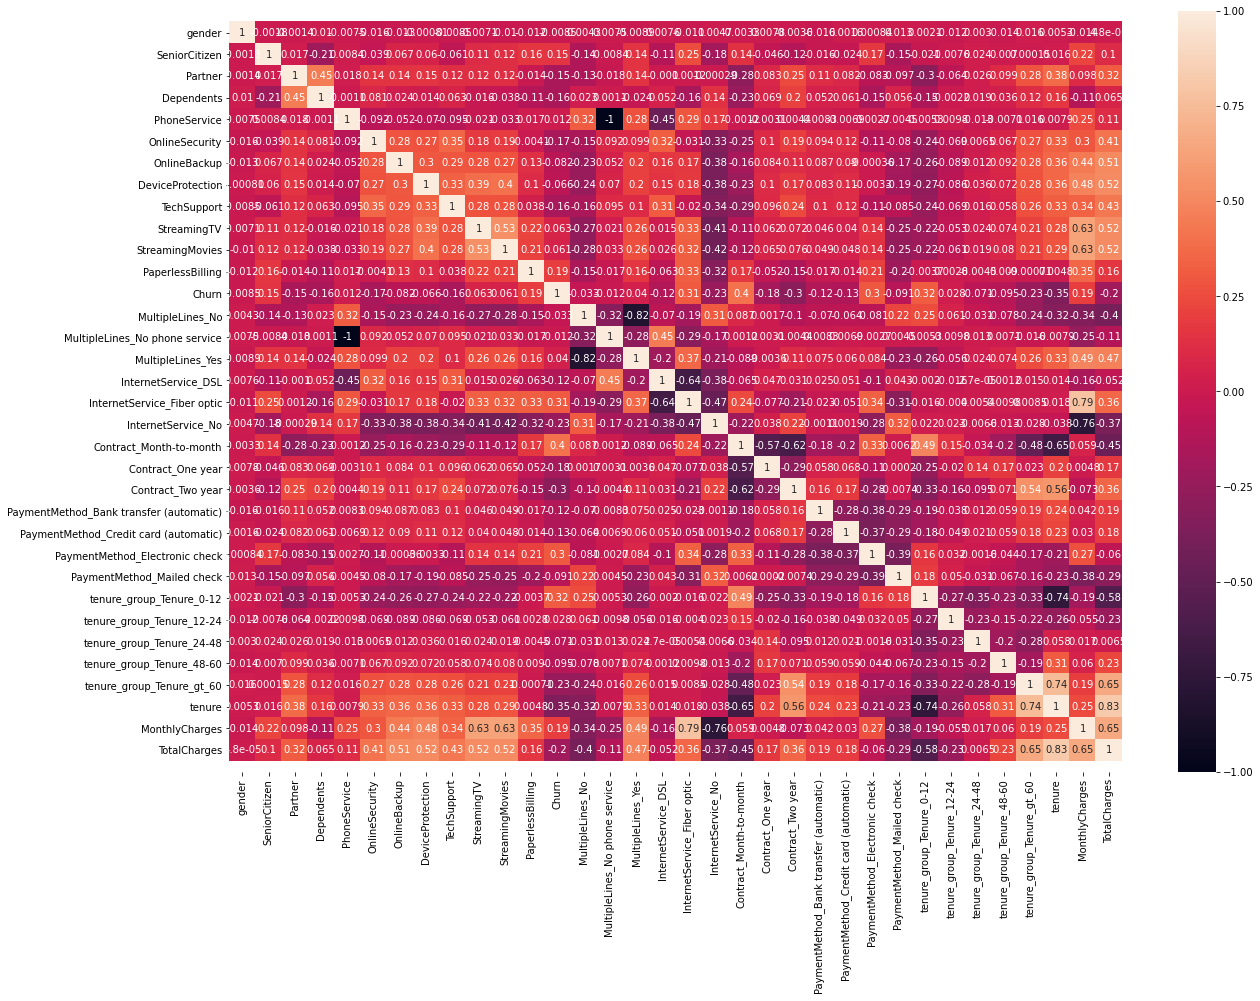

In [26]:
def ExploreCorrelation(df, significance, corr_map=False, cor_table=False):
    corr = df.corr()
    
    #Display correlation table
    if(cor_table): 
        display(corr)
    
    #Correlation heatmap
    if(corr_map):
        plt.figure(figsize=(20,14))
        ax = sns.heatmap(corr, annot=True) #notation: "annot" not "annote"
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
    
    print('-'*75)
    print('Highest correlation')
    
    
    #Filter significant correlation in upper triangle of the table 
    
    # remove values below index with NAN and then replace NAN with 0
    corr_upper = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))
    corr_upper = corr_upper.fillna(0)
    
    #unstack and sort dataframe
    corr_unstack = corr_upper.unstack()
    corr_sorted = corr_unstack.sort_values(kind="quicksort", ascending=False)
    #filter correlation by signifiance       
    corr_result = corr_sorted[((corr_sorted.values <1) & (corr_sorted.values >significance)) | (corr_sorted.values <-significance)]
    
    #Display all results
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(corr_result)
    
ExploreCorrelation(df,0.5, True, True)

### Visualising data with principal components

In [27]:
x = df[[x for x in df.columns if x not in id_col + label]]
y = df[label + id_col]
x_clust = x
x_clust.head()

gender  SeniorCitizen  Partner  Dependents  PhoneService  OnlineSecurity  \
0       0              0        1           0             0               0   
1       1              0        0           0             1               1   
2       1              0        0           0             1               1   
3       1              0        0           0             0               1   
4       0              0        0           0             1               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  \
0             1                 0            0            0  ...   
1             0                 1            0            0  ...   
2             1                 0            0            0  ...   
3             0                 1            1            0  ...   
4             0                 0            0            0  ...   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                               1                           0   
1                               0                           1   
2                               0                           1   
3                               0                           0   
4                               1                           0   

   tenure_group_Tenure_0-12  tenure_group_Tenure_12-24  \
0                         1                          0   
1                         0                          0   
2                         1                          0   
3                         0                          0   
4                         1                          0   

   tenure_group_Tenure_24-48  tenure_group_Tenure_48-60  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          1                          0   
4                          0                          0   

   tenure_group_Tenure_gt_60    tenure  MonthlyCharges  TotalCharges  
0                          0 -1.280248       -1.161694     -0.994194  
1                          0  0.064303       -0.260878     -0.173740  
2                          0 -1.239504       -0.363923     -0.959649  
3                          0  0.512486       -0.747850     -0.195248  
4                          0 -1.239504        0.196178     -0.940457  

[5 rows x 33 columns]

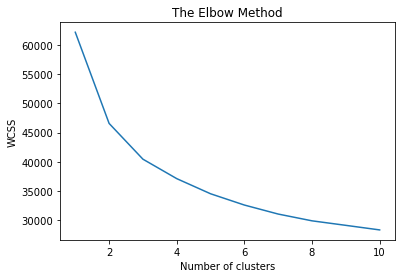

In [28]:
#Elbow analysis
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_clust)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



Number of clusters = 2
Silhouette score = 0.23386420072837727

Number of clusters = 3
Silhouette score = 0.19048296552162222

Number of clusters = 4
Silhouette score = 0.18182063517279445

Number of clusters = 5
Silhouette score = 0.16911804207379708

Number of clusters = 6
Silhouette score = 0.15461033375419117

Number of clusters = 7
Silhouette score = 0.15259413041272793

Number of clusters = 8
Silhouette score = 0.14970880240271625

Number of clusters = 9
Silhouette score = 0.1400849498928851

Optimal number of clusters = 2


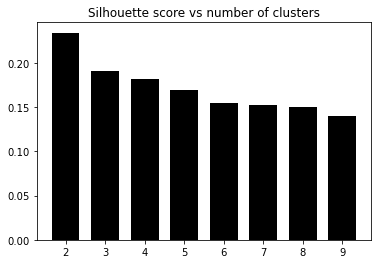

In [29]:
#Silhouette analysis 
from sklearn import metrics

# Initialize variables
scores = []
values = np.arange(2, 10)

# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(x_clust)
    score = metrics.silhouette_score(x_clust, kmeans.labels_, 
                metric='euclidean', sample_size=len(x_clust))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)
    
# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

In [30]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_clust)
y_kmeans

array([1, 1, 1, ..., 1, 1, 0])

In [31]:
x_clust['clust'] = y_kmeans
x_clust.head()

gender  SeniorCitizen  Partner  Dependents  PhoneService  OnlineSecurity  \
0       0              0        1           0             0               0   
1       1              0        0           0             1               1   
2       1              0        0           0             1               1   
3       1              0        0           0             0               1   
4       0              0        0           0             1               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  \
0             1                 0            0            0  ...   
1             0                 1            0            0  ...   
2             1                 0            0            0  ...   
3             0                 1            1            0  ...   
4             0                 0            0            0  ...   

   PaymentMethod_Mailed check  tenure_group_Tenure_0-12  \
0                           0                         1   
1                           1                         0   
2                           1                         1   
3                           0                         0   
4                           0                         1   

   tenure_group_Tenure_12-24  tenure_group_Tenure_24-48  \
0                          0                          0   
1                          0                          1   
2                          0                          0   
3                          0                          1   
4                          0                          0   

   tenure_group_Tenure_48-60  tenure_group_Tenure_gt_60    tenure  \
0                          0                          0 -1.280248   
1                          0                          0  0.064303   
2                          0                          0 -1.239504   
3                          0                          0  0.512486   
4                          0                          0 -1.239504   

   MonthlyCharges  TotalCharges  clust  
0       -1.161694     -0.994194      1  
1       -0.260878     -0.173740      1  
2       -0.363923     -0.959649      1  
3       -0.747850     -0.195248      1  
4        0.196178     -0.940457      1  

[5 rows x 34 columns]

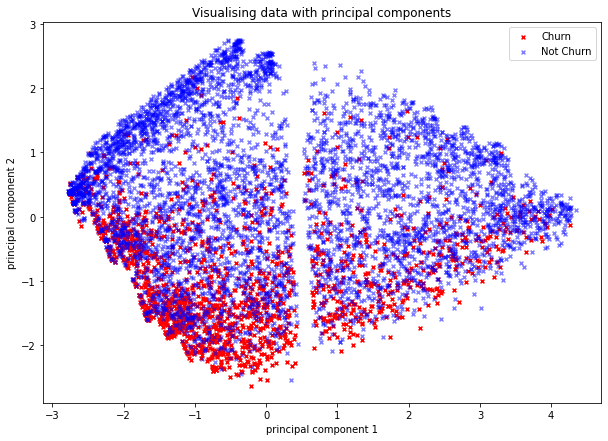

In [32]:
# Applying PCA to make 2 dimentions 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

x_rd = pca.fit_transform(x)
pca_data = pd.DataFrame(x_rd,columns = ["PC1","PC2"])
pca_data = pca_data.merge(y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})
plt.figure(figsize=(10,7))
plt.scatter(pca_data[pca_data["Churn"] == 'Churn']["PC1"], pca_data[pca_data["Churn"] == 'Churn']["PC2"], marker='x', s = 15, c = 'red', label = 'Churn')
plt.scatter(pca_data[pca_data["Churn"] == 'Not Churn']["PC1"], pca_data[pca_data["Churn"] == 'Not Churn']["PC2"], marker='x', s = 15, c = 'blue', alpha = 0.5, label = 'Not Churn')

plt.title('Visualising data with principal components')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()
plt.show()

In [33]:
pca.explained_variance_ratio_

array([0.35427206, 0.15132945])

### Binary variables distribution in customer attrition(Radar Chart)

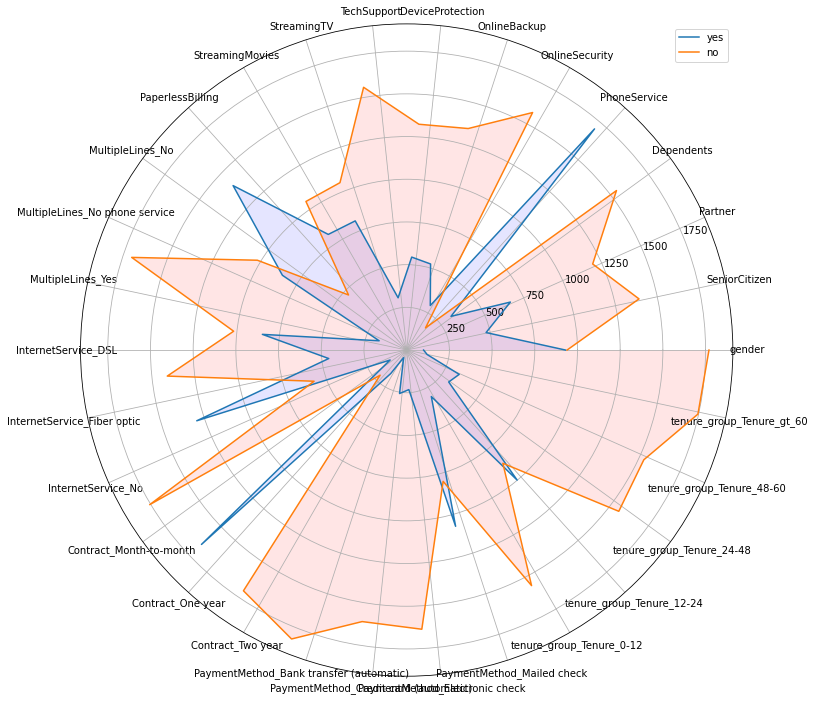

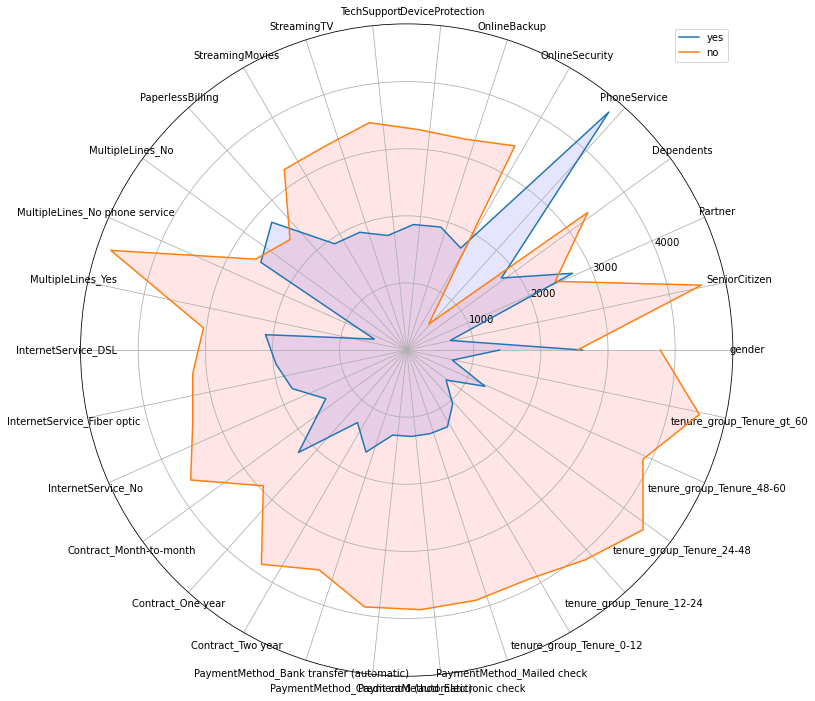

In [34]:
bi_cs = df.nunique()[df.nunique() == 2].keys()
df_bi = df[bi_cs]

def plot_radar(data, aggregate, title):
    data_ = data[data['Churn'] == aggregate]
    data_x = data_[bi_cs].sum().reset_index()
    data_x.columns = ['feature', 'yes']
    data_x['no'] = data_.shape[0] - data_x['yes']
    data_x = data_x[data_x['feature'] != 'Churn']
    
    lab = data_x['feature']
    yes= data_x['yes'].values.tolist()
    no = data_x['no'].values.tolist()

    plt.figure(figsize=(18, 12))
    plt.subplot(polar=True)
 
    theta = np.linspace(0, 2 * np.pi, len(yes))
    lines, labels = plt.thetagrids(range(0, 360, int(360/len(lab))), (lab))
    

    plt.plot(theta, yes)
    plt.fill(theta, yes, 'b', alpha=0.1)
 
    plt.plot(theta, no)
    plt.fill(theta, no, 'r', alpha=0.1)

    plt.legend(labels=('yes', 'no'), loc=1)

    plt.show()
    
    
    
    
plot_radar(df_bi,1,"Churn -  Customers")
plot_radar(df_bi,0,"Non Churn - Customers")
    

## Model Building

### Baseline Model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

In [36]:
#split data to training and test sets
train, test = train_test_split(df, test_size = 0.25, random_state = 111)

features = [x for x in df.columns if x not in id_col + label]
train_X = train[features]
train_y = train[label]
test_X = test[features]
test_y = test[label]

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1268
           1       0.68      0.52      0.59       490

    accuracy                           0.80      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.79      0.80      0.79      1758

Accuracy score: 0.79806598407281
Area under curve: 0.7122593832485675 



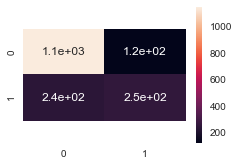

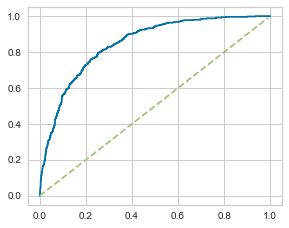

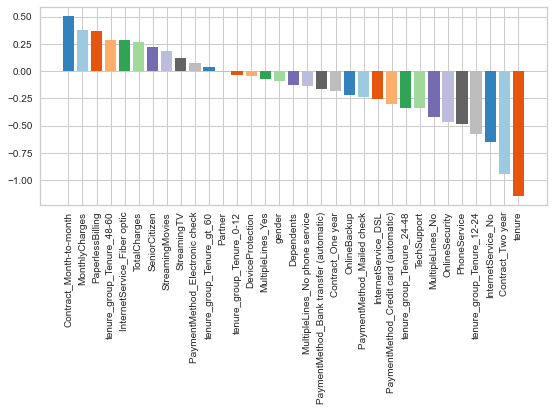

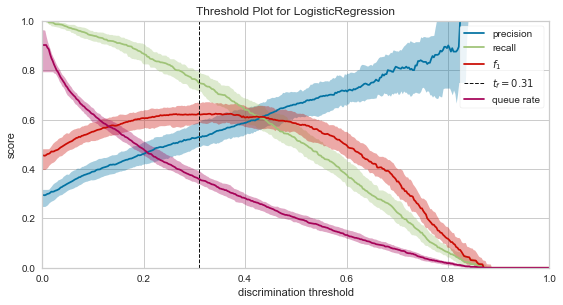

In [37]:
#function telecom churn
#function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf            -["coefficients","features"]
#threshold_plot - if True returns threshold plot for model
    
def telecom_churn_prediction(algorithm, training_X, testing_X,
                            training_y, testing_y, cols, cf, threshold_plot):
    #model
    m = algorithm.fit(training_X, training_y)
    algorithm.fit(training_X, training_y)
    predictions = algorithm.predict(testing_X)
    probabilities = algorithm.predict_proba(testing_X)
    #print(probabilities)
    
    #coeffs
    if cf == 'coefficient':
        coefficient = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == 'feature':
        coefficient = pd.DataFrame(algorithm.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_sum = (pd.merge(coefficient, column_df, left_index= True,
                        right_index = True, how= 'left'))
    coef_sum.columns = ['coefficient', 'feature']
    coef_sum = coef_sum.sort_values(by= 'coefficient', ascending = False)
    print(algorithm)
    print('\n Classification report: \n', 
          classification_report(testing_y, predictions))
    print('Accuracy score:', accuracy_score(testing_y, predictions))
    
    #confusion matrix
    cm = confusion_matrix(testing_y, predictions)
    #roc_auc
    model_roc_auc = roc_auc_score(testing_y, predictions)
    print('Area under curve:', model_roc_auc, '\n')
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:, 1])
    
    cmap = plt.get_cmap("tab20c")
    colors = cmap(np.arange(10)*2)
    fig = plt.figure()
    ax = fig.add_subplot(221)
    #plot confusion matrix
    #plt.subplot(221)
    #plt.figure(figsize=(5,5))
    ax = sns.heatmap(cm, annot=True) 
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    #plot roc curve
    #plt.subplots(222)
    #plt.figure(figsize=(5,5))
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(222)
    ax.plot(fpr, tpr, label = 'ROC')
    ax.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01),'--')
    
    
    #plot coeffs
    fig = plt.figure(figsize= (20,8))
    ax = fig.add_subplot(223)
    ax.bar(coef_sum["feature"],coef_sum["coefficient"], color= colors)
    plt.xticks(rotation='vertical')
    
    #threshold_plot
    
    if threshold_plot == True :
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(224)
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_X,training_y)
        visualizer.poof()

    
    
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_y,test_y,
                         features,"coefficient",threshold_plot = True)

### Synthetic Minority Oversampling TEchnique (SMOTE)
"A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line."

- A random example from the minority class is first chosen. 
- K of the nearest neighbors for that example are found (typically k=5). 
- A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1268
           1       0.59      0.70      0.64       490

    accuracy                           0.78      1758
   macro avg       0.73      0.75      0.74      1758
weighted avg       0.79      0.78      0.78      1758

Accuracy score: 0.7792946530147895
Area under curve: 0.754968454258675 



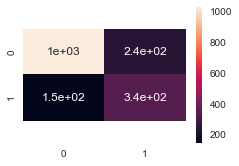

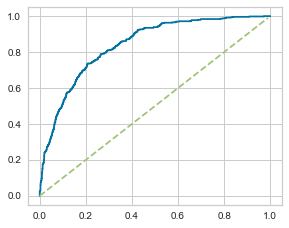

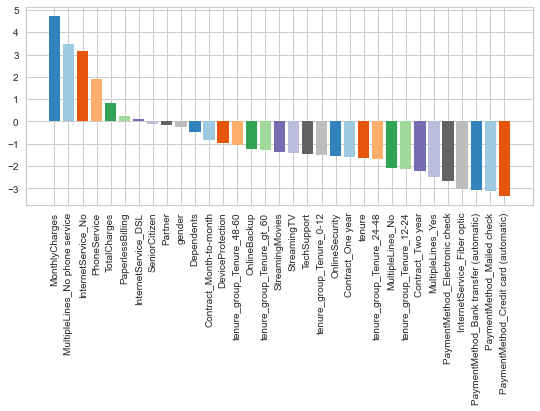

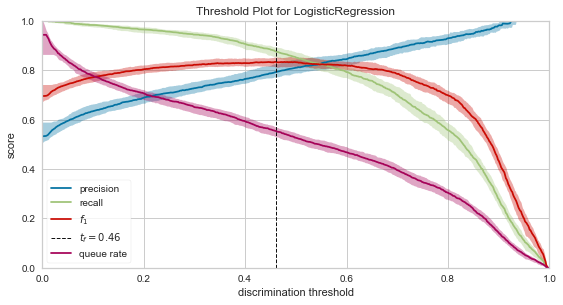

In [38]:
from imblearn.over_sampling import SMOTE
cols = [x for x in df.columns if x not in id_col + label]

smote_X = df[cols]
smote_y = df[label]

#split train and test data
smote_train_X, smote_test_X, smote_train_y, smote_test_y = train_test_split(
smote_X, smote_y, test_size = 0.25, random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state=0)
os_smote_X, os_smote_y = os.fit_sample(smote_train_X, smote_train_y)
os_smote_X = pd.DataFrame(data = os_smote_X, columns= cols)
os_smote_y = pd.DataFrame(data = os_smote_y, columns= label)

logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_y,test_y,
                         cols,"coefficient",threshold_plot = True)


### Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal is to select features by recursively considering smaller and smaller sets of features.

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.71      0.78      1268
           1       0.49      0.72      0.58       490

    accuracy                           0.71      1758
   macro avg       0.68      0.71      0.68      1758
weighted avg       0.76      0.71      0.73      1758

Accuracy score: 0.7133105802047781
Area under curve: 0.7148619069078735 



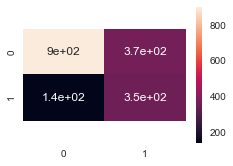

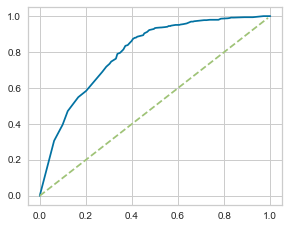

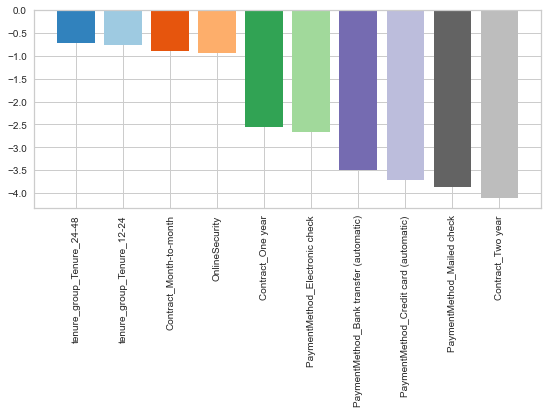

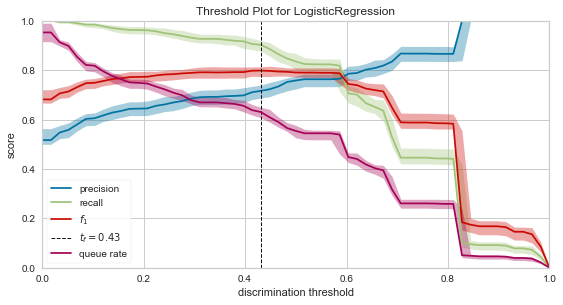

In [39]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit, 10)
rfe = rfe.fit(os_smote_X, os_smote_y.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({'rfe_support': rfe.support_, 
                       'columns' : [x for x in df.columns if x not in 
                                   id_col + label], 'ranking': rfe.ranking_})
cols = idc_rfe[idc_rfe['rfe_support'] == True]['columns'].tolist()

#separating train and test data
train_rfe_X = os_smote_X[cols]
train_rfe_y = os_smote_y
test_rfe_X  = test[cols]
test_rfe_y  = test[label]

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
telecom_churn_prediction(logit_rfe,train_rfe_X,test_rfe_X,train_rfe_y,test_rfe_y,
                         cols,"coefficient",threshold_plot = True)

In [40]:
idc_rfe

rfe_support                                  columns  ranking
0         False                                   gender       21
1         False                            SeniorCitizen       24
2         False                                  Partner       23
3         False                               Dependents       20
4         False                             PhoneService       14
5          True                           OnlineSecurity        1
6         False                             OnlineBackup        8
7         False                         DeviceProtection       15
8         False                              TechSupport        7
9         False                              StreamingTV       11
10        False                          StreamingMovies       12
11        False                         PaperlessBilling       22
12        False                         MultipleLines_No        5
13        False           MultipleLines_No phone service       19
14        False                        MultipleLines_Yes        6
15        False                      InternetService_DSL       10
16        False              InternetService_Fiber optic        9
17        False                       InternetService_No       13
18         True                  Contract_Month-to-month        1
19         True                        Contract_One year        1
20         True                        Contract_Two year        1
21         True  PaymentMethod_Bank transfer (automatic)        1
22         True    PaymentMethod_Credit card (automatic)        1
23         True           PaymentMethod_Electronic check        1
24         True               PaymentMethod_Mailed check        1
25        False                 tenure_group_Tenure_0-12       16
26         True                tenure_group_Tenure_12-24        1
27         True                tenure_group_Tenure_24-48        1
28        False                tenure_group_Tenure_48-60        3
29        False                tenure_group_Tenure_gt_60        2
30        False                                   tenure       17
31        False                           MonthlyCharges        4
32        False                             TotalCharges       18

### Univariate Selection
- Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
- Uses the chi squared statistical test for non-negative features to select the best features

In [41]:
from sklearn.feature_selection import chi2, SelectKBest

cols = [x for x in df.columns if x not in id_col + label]
df_x = df_og[cols]
df_y = df_og[label]

#fit model with k = 3
select = SelectKBest(score_func = chi2, k = 3)
fit = select.fit(df_x, df_y)

print('scores')
print(fit.scores_)
print('P_Value')
print(fit.pvalues_)

#create dataframe
score = pd.DataFrame({'feature': cols, 'scores': fit.scores_,
                     'p_values': fit.pvalues_})

score = score.sort_values(by = 'scores', ascending= False)

#createing new label for categorical and numerical columns
score['feature_type'] = np.where(score['feature'].isin(num_cols),
                                 'Numerical','Categorical')


scores
[2.54297062e-01 1.33482766e+02 8.18577694e+01 1.31271509e+02
 9.29483891e-02 1.47165601e+02 3.12098318e+01 2.02160070e+01
 1.35439602e+02 1.73206148e+01 1.59306111e+01 1.04979224e+02
 3.88864216e+00 8.68247305e-01 6.51465136e+00 7.11376111e+01
 3.72082851e+02 2.85475152e+02 5.16714004e+02 1.76608724e+02
 4.86223101e+02 7.66190658e+01 9.99725387e+01 4.24113152e+02
 4.47251434e+01 5.08751462e+02 4.61987613e+00 2.70775100e+01
 5.63332260e+01 3.01035414e+02 1.63773281e+04 3.65307468e+03
 6.29630810e+05]
P_Value
[6.14065505e-001 7.08954608e-031 1.46240915e-019 2.15953960e-030
 7.60461827e-001 7.21988253e-034 2.31590182e-008 6.91717063e-006
 2.64595220e-031 3.15742928e-005 6.57073922e-005 1.23423173e-024
 4.86137123e-002 3.51440986e-001 1.06989295e-002 3.33158163e-017
 6.58713045e-083 4.81399951e-064 2.19511926e-114 2.66631661e-040
 9.45428638e-108 2.07328356e-018 1.54524820e-023 3.10584857e-094
 2.26727030e-011 1.18539043e-112 3.16035203e-002 1.95458729e-007
 6.11729227e-014 1.959705

In [42]:
score.head()

feature         scores       p_values feature_type
32              TotalCharges  629630.810349   0.000000e+00    Numerical
30                    tenure   16377.328093   0.000000e+00    Numerical
31            MonthlyCharges    3653.074681   0.000000e+00    Numerical
18   Contract_Month-to-month     516.714004  2.195119e-114  Categorical
25  tenure_group_Tenure_0-12     508.751462  1.185390e-112  Categorical

Text(0.5, 1.0, 'Numerical')

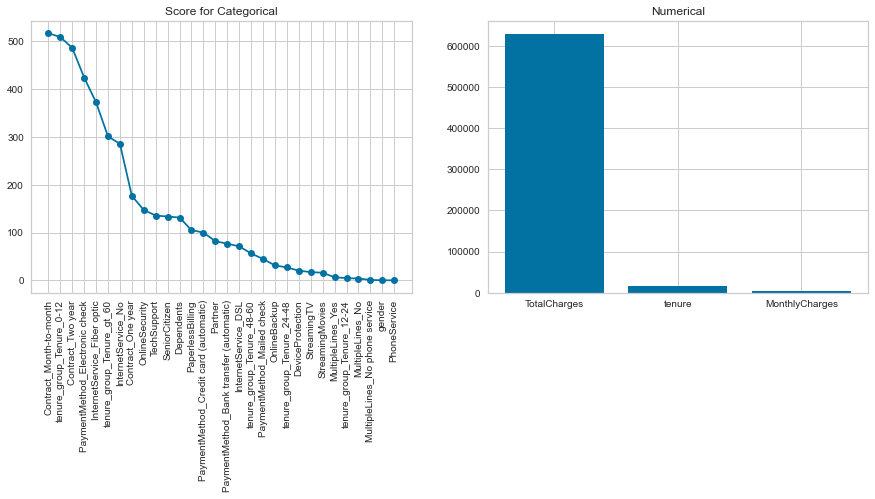

In [43]:
#plot
fig, ax = plt.subplots(figsize=(15, 5))
plt.subplot(121)
x = np.arange(len(score[score['feature_type'] == 'Categorical']['feature']))
x_labels = list(score[score['feature_type'] == 'Categorical']['feature'])

plt.plot(score[score['feature_type'] == 'Categorical']['feature'],
           score[score['feature_type'] == 'Categorical']['scores'], 'o-')

plt.xticks(x_labels, rotation=90)
plt.title('Score for Categorical')

plt.subplot(122)
plt.bar(score[score["feature_type"] == "Numerical"]["feature"],
        score[score["feature_type"] == "Numerical"]["scores"])
plt.title('Numerical')

## Decision Tree Visualization

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source

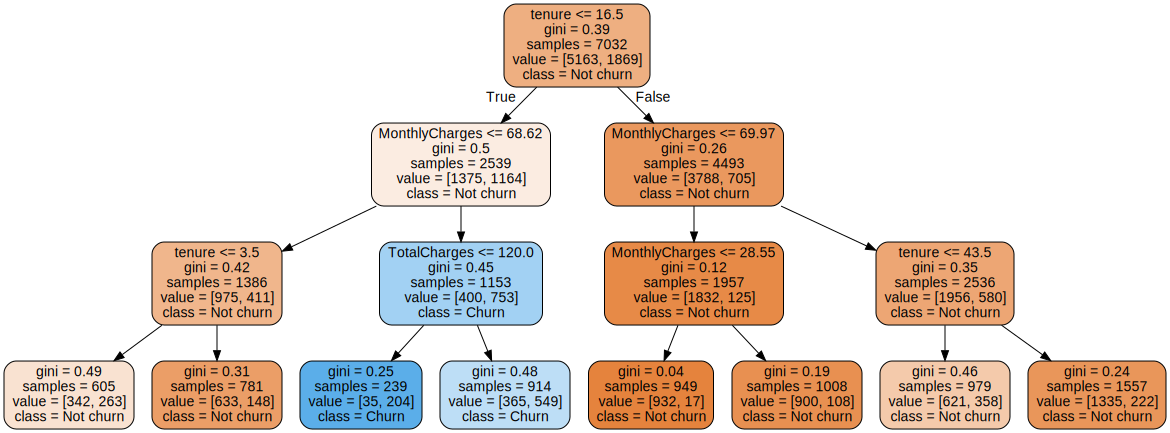

In [45]:
#top 3 categorical features
features_cat = score[score['feature_type']== 'Categorical']['feature'][:3].tolist()

#top 3 numerical features
features_num = score[score['feature_type']== 'Numerical']['feature'][:3].tolist()

#Function attributes
#columns        - selected columns
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]
#Model Performance - True (gives model output)

def plot_decision_tree(columns, maximum_depth, criterion_type,
                      split_type, model_performance= None):
    #separating dependent and independant variables
    dtc_x = df_x[columns]
    dtc_y = df_y[label]
    
    #model
    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth, 
                                          splitter = split_type, 
                                          criterion= criterion_type)
    dt_classifier.fit(dtc_x, dtc_y)
    
    #plot decision tree
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )
    
    #model performance
    if model_performance == True :
        telecom_churn_prediction(dt_classifier,
                                 dtc_x,test_X[columns],
                                 dtc_y,test_y,
                                 columns,'feature',threshold_plot = True)
    display(graph)
    
plot_decision_tree(features_num,3,'gini','best')

DecisionTreeClassifier(max_depth=3)

 Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1268
           1       0.53      0.51      0.52       490

    accuracy                           0.74      1758
   macro avg       0.67      0.67      0.67      1758
weighted avg       0.73      0.74      0.74      1758

Accuracy score: 0.7366325369738339
Area under curve: 0.6684204596665164 



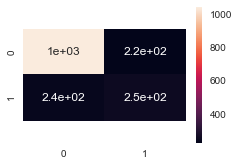

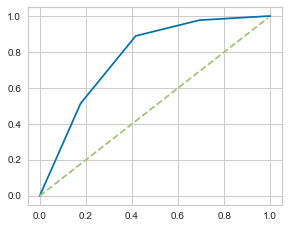

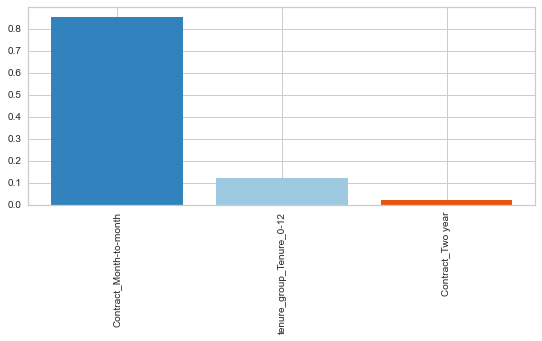

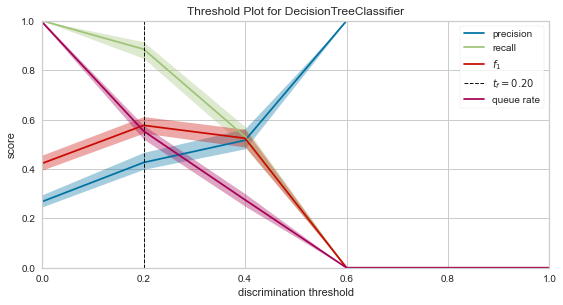

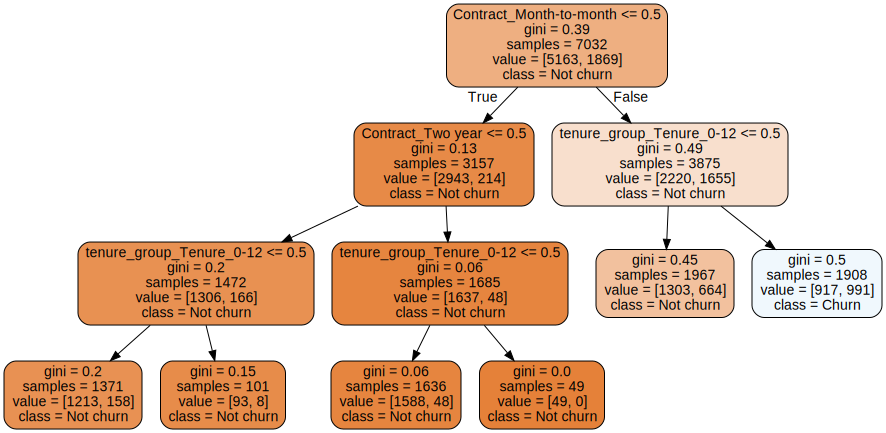

In [46]:
#top three categorical features
plot_decision_tree(features_cat,3,'gini','best', model_performance = True)

DecisionTreeClassifier(max_depth=3)

 Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.74      0.79      1268
           1       0.50      0.66      0.57       490

    accuracy                           0.72      1758
   macro avg       0.68      0.70      0.68      1758
weighted avg       0.75      0.72      0.73      1758

Accuracy score: 0.7218430034129693
Area under curve: 0.7038724006952939 



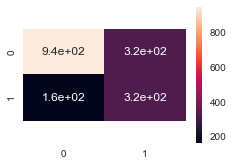

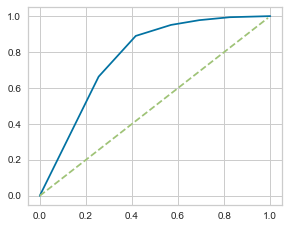

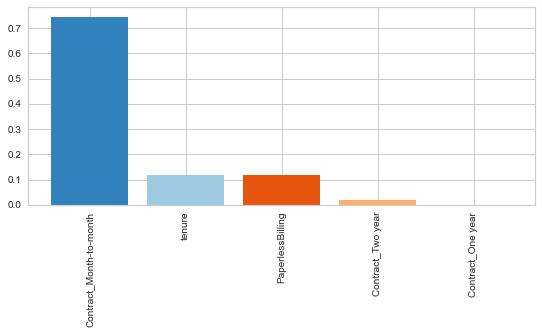

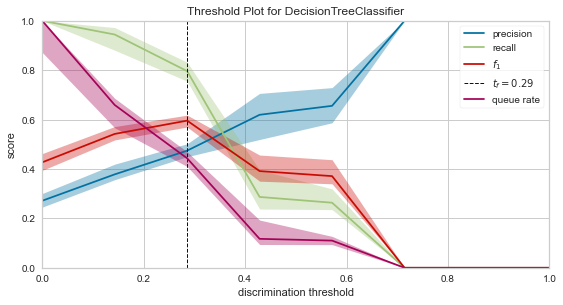

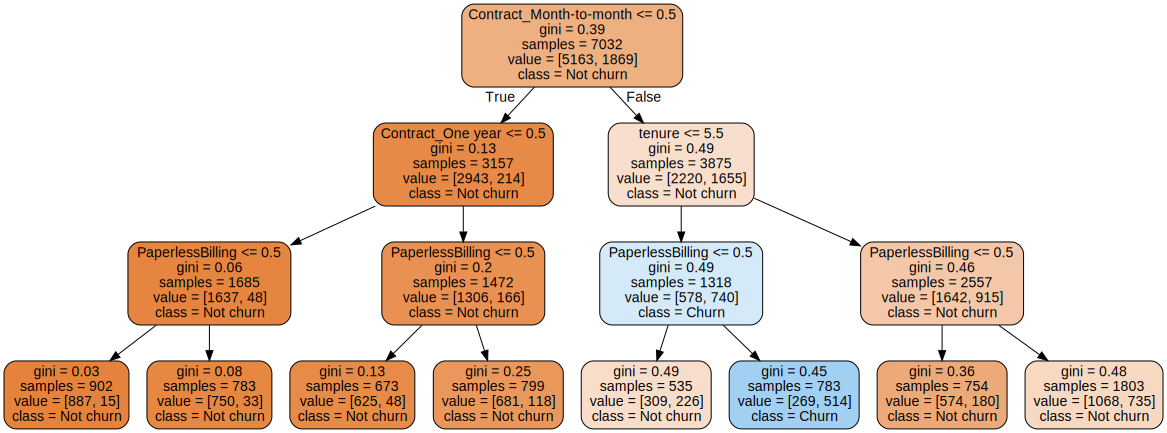

In [47]:
#using contract,tenure and paperless billing variables
columns = ['tenure','Contract_Month-to-month', 'PaperlessBilling',
           'Contract_One year', 'Contract_Two year']

plot_decision_tree(columns,3,'gini','best',model_performance= True)


### KNN Classifier

KNeighborsClassifier(n_jobs=1)

 Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.74      0.80      1268
           1       0.51      0.69      0.58       490

    accuracy                           0.73      1758
   macro avg       0.68      0.71      0.69      1758
weighted avg       0.76      0.73      0.74      1758

Accuracy Score   :  0.7275312855517634
Area under curve :  0.7147025687246508


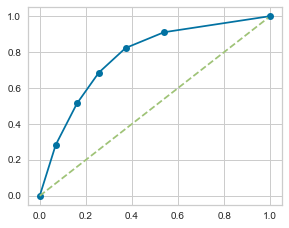

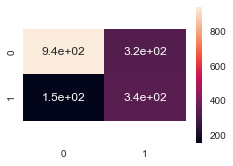

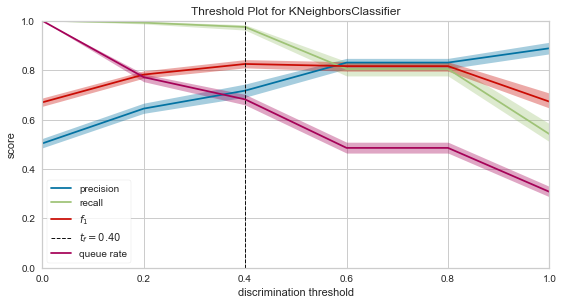

In [48]:
def telecom_churn_prediction_alg(algorithm, training_X, testing_X,
                                training_y, testing_y,threshold_plot=True):
    #model
    algorithm.fit(training_X, training_y)
    predictions = algorithm.predict(testing_X)
    probabilities = algorithm.predict_proba(testing_X)
    
    print(algorithm)
    print('\n Classification report: \n', classification_report(
    testing_y, predictions))
    
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    cm = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    
    #plot roc curve
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    ax.plot(fpr, tpr,'o-', label = 'ROC')
    ax.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01),'--')
    
    cmap = plt.get_cmap("tab20c")
    colors = cmap(np.arange(10)*2)
    fig = plt.figure()
    ax = fig.add_subplot(222)
    #plot confusion matrix
    #plt.subplot(221)
    #plt.figure(figsize=(5,5))
    ax = sns.heatmap(cm, annot=True) 
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
   
    
    #threshold_plot
    
    if threshold_plot == True :
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(224)
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_X,training_y)
        visualizer.poof()

    
    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
telecom_churn_prediction_alg(knn,os_smote_X,test_X,
                             os_smote_y,test_y,threshold_plot = True)

### Vizualising a decision tree from random forest classifier

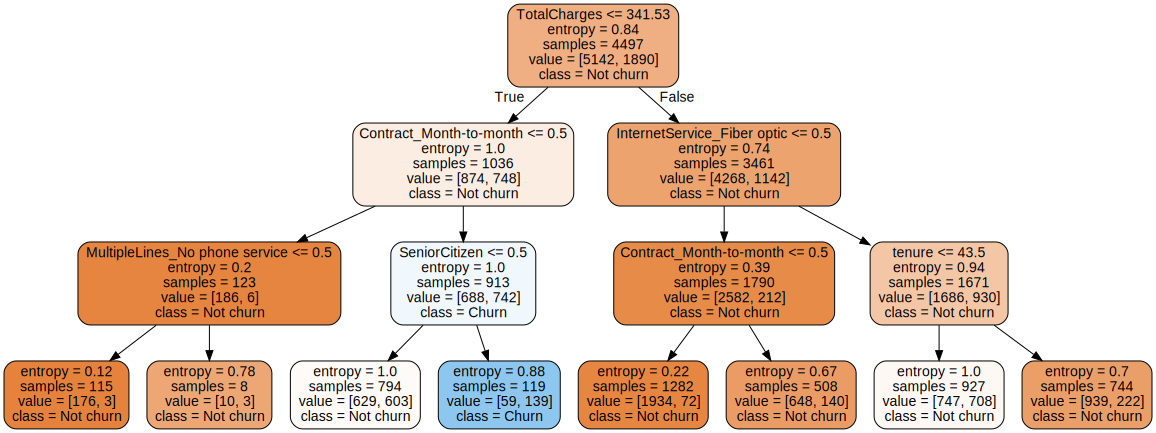

RandomForestClassifier(criterion='entropy', max_depth=3)

 Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86      1268
           1       0.71      0.33      0.45       490

    accuracy                           0.78      1758
   macro avg       0.75      0.64      0.65      1758
weighted avg       0.77      0.78      0.74      1758

Accuracy score: 0.7758816837315131
Area under curve: 0.638028713062512 



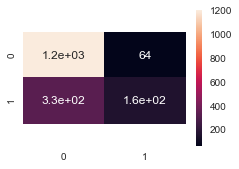

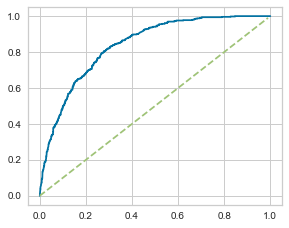

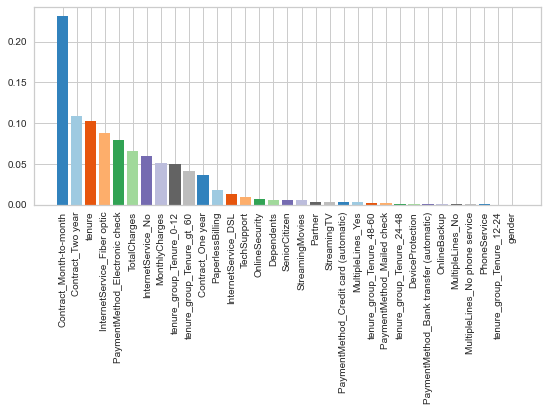

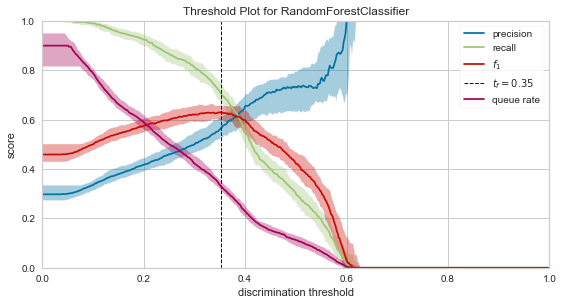

In [49]:
from sklearn.ensemble import RandomForestClassifier

#function attributes
#columns  - column used
#nf_estimators   - The number of trees in the forest.
#estimated_tree  - tree number to be displayed
#maximum_depth   - depth of the tree
#criterion_type  - split criterion type ["gini" or "entropy"]
#Model performance - prints performance of model

def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = None) :
    
    dataframe = df_og[columns + label].copy()
    
    #train and test datasets
    rf_X     = dataframe[[x for x in columns if x not in label]]
    rf_y     = dataframe[label]
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rf_X,rf_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = columns, 
                            precision  = 2,
                            class_names=['Not churn','Churn'],
                            filled = True))
    display(graph)
    
    #model performance
    if model_performance == True :
        telecom_churn_prediction(rfc,
                                 rf_X,test_X[columns],
                                 rf_y,test_y,
                                 columns,'feature',threshold_plot = True)
        

cols1 = [ x for x in train_X.columns if x not in label + id_col] 
plot_tree_randomforest(cols1,100,99,3,'entropy',True)

### A random forest classifier

Below are the trees produced by random forest model with 10 estimated trees with maximum depth of three for each tree. Each tree produced is slightly different from other.

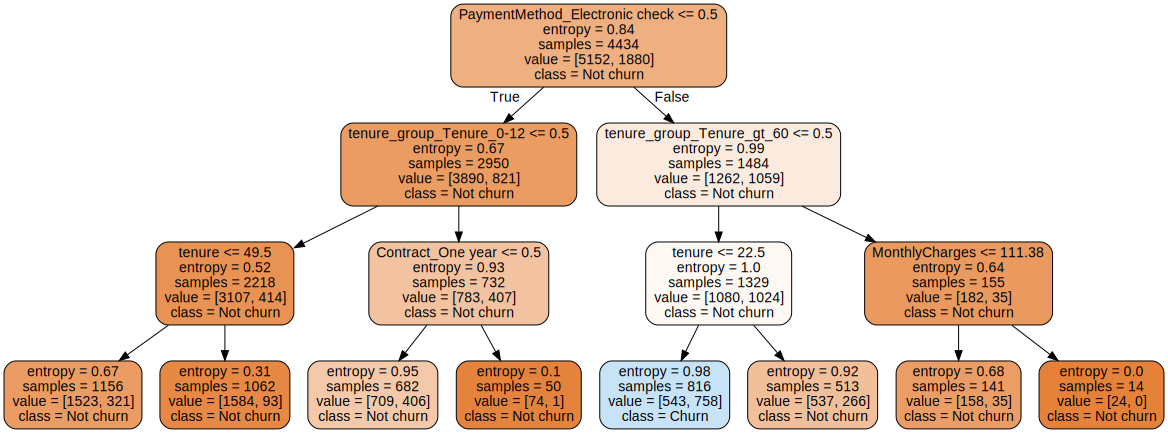

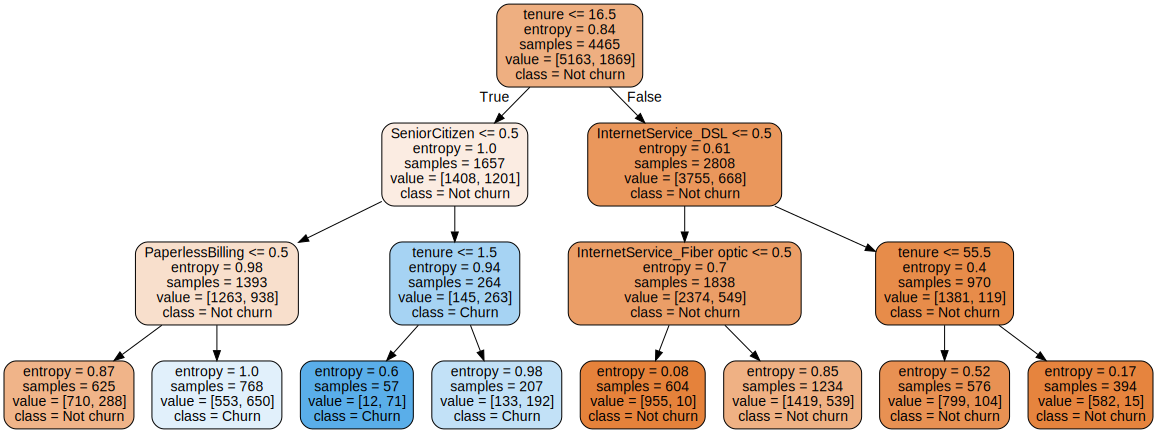

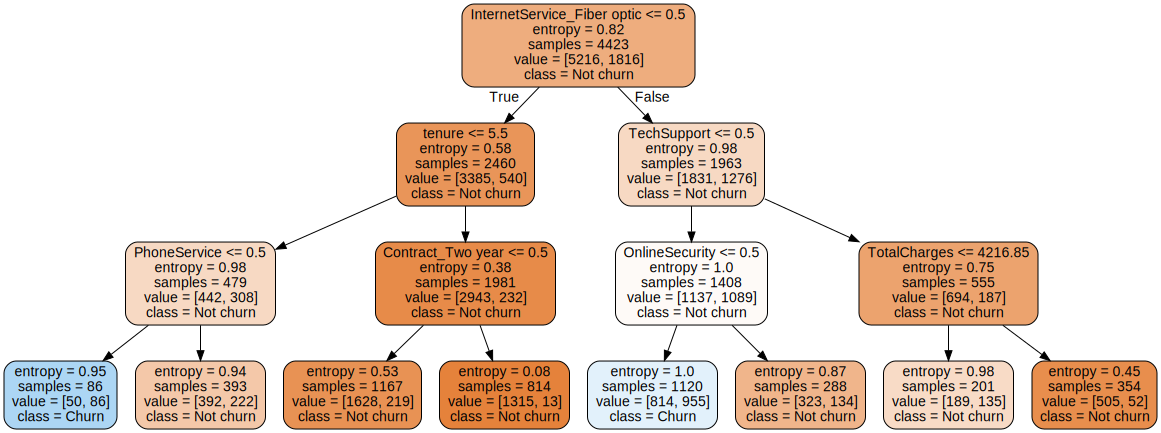

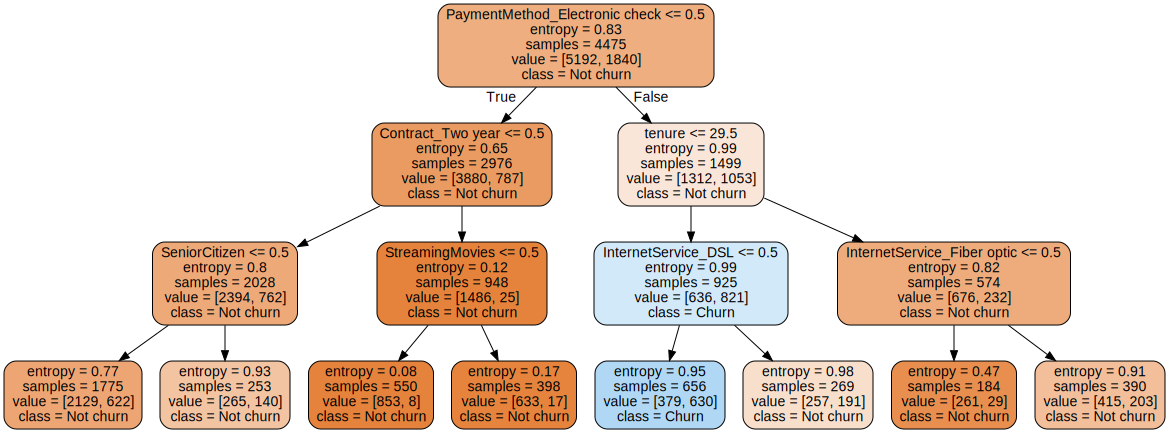

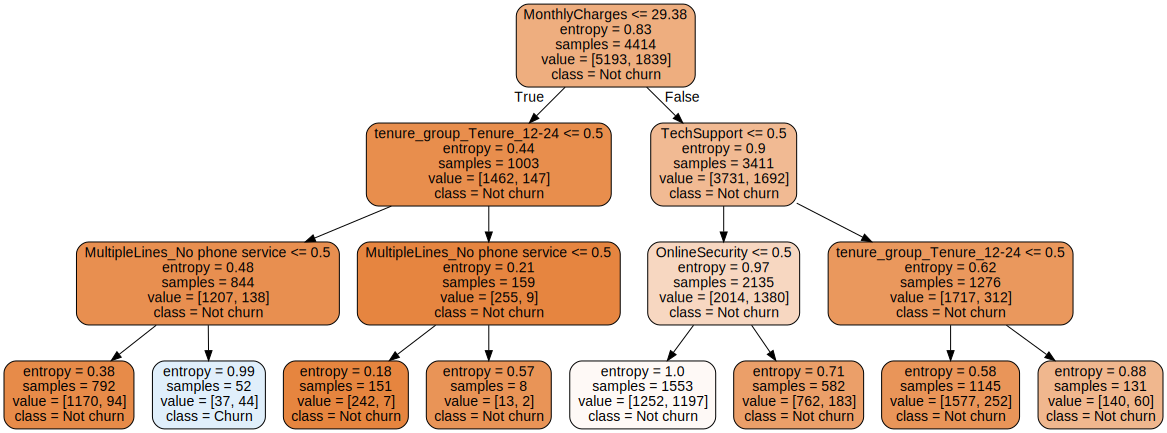

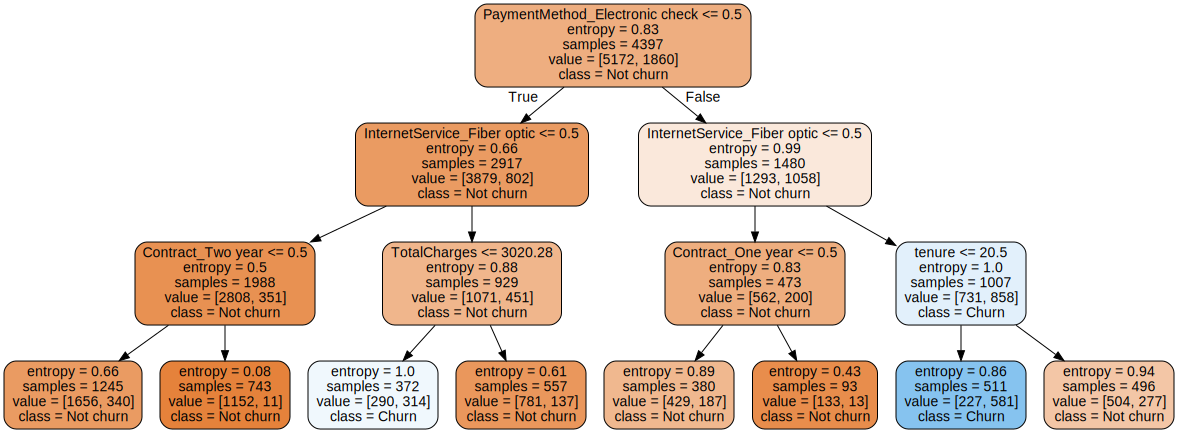

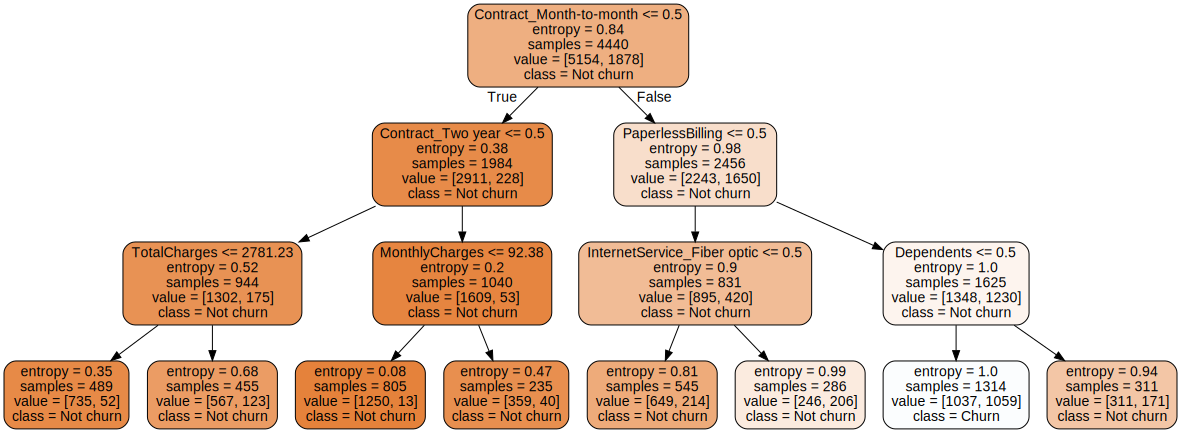

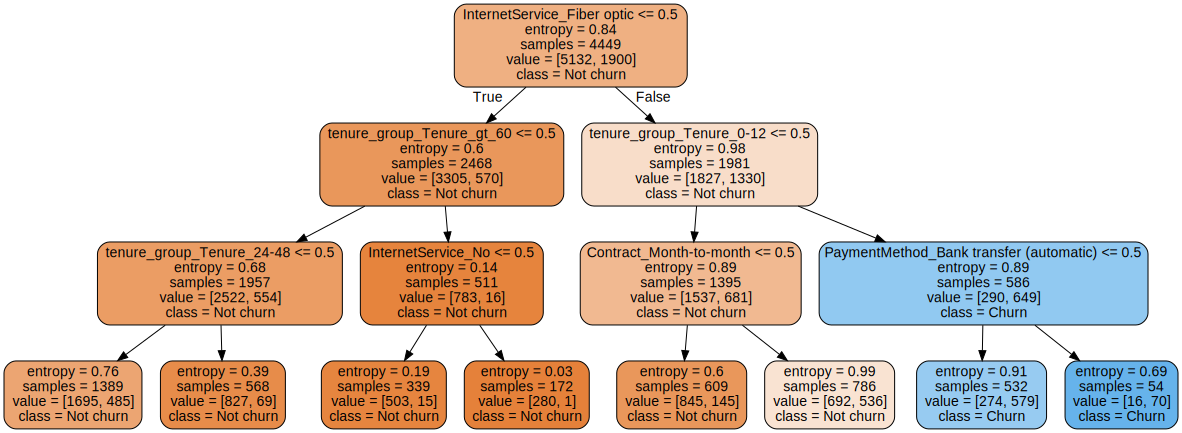

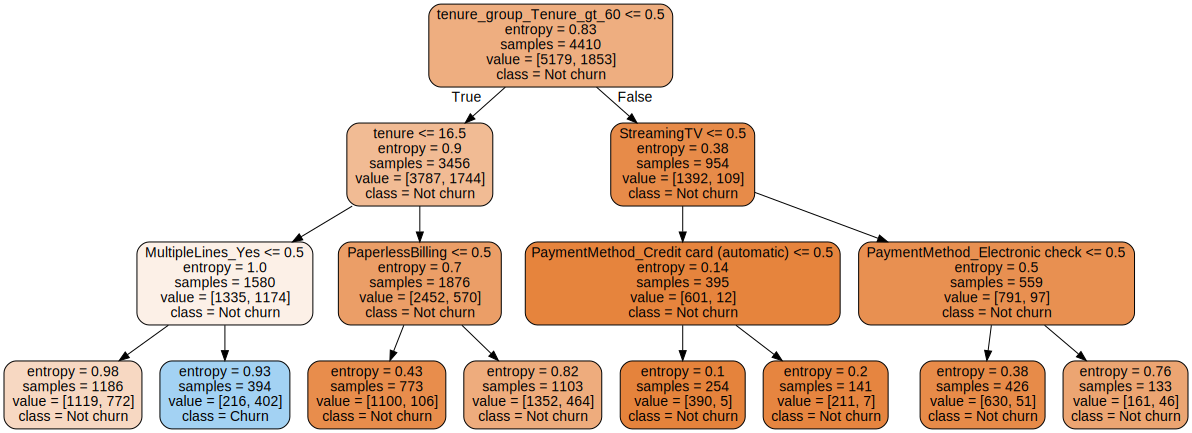

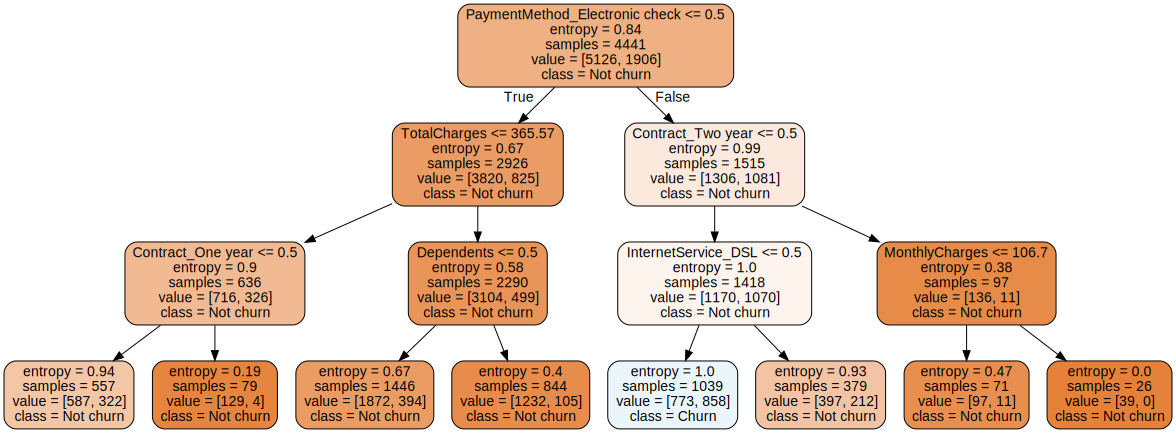

In [50]:
#making 10 trees with random forest.
n = np.arange(0,10).tolist()
cols1 = [ i for i in train_X.columns if i not in label + id_col] 
for i in n :
    plot_tree_randomforest(cols1,10,i,3,"entropy",model_performance=False)

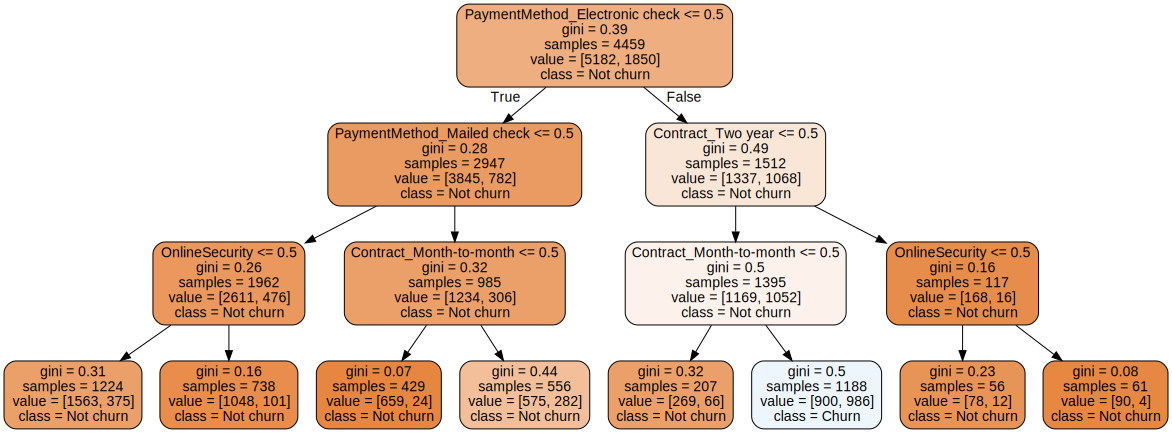

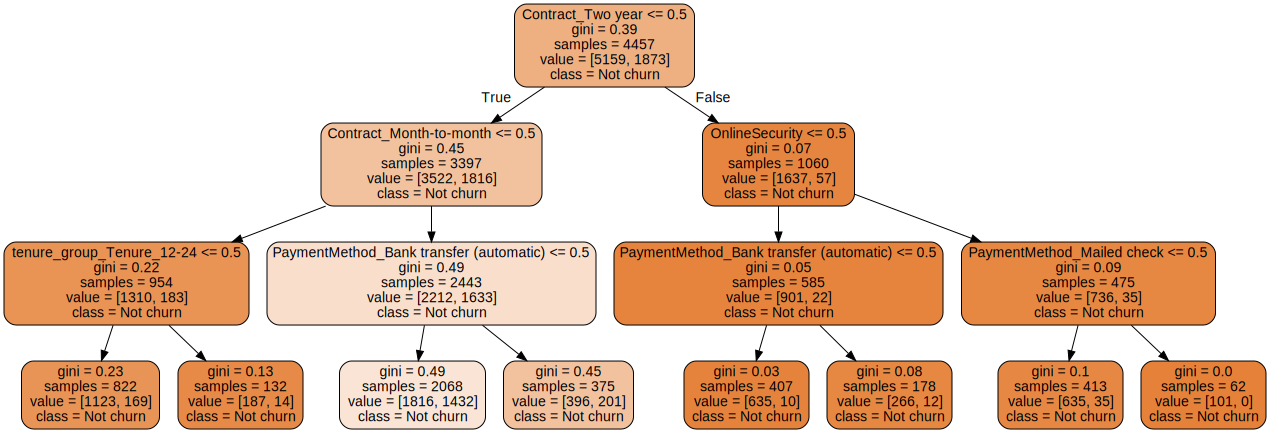

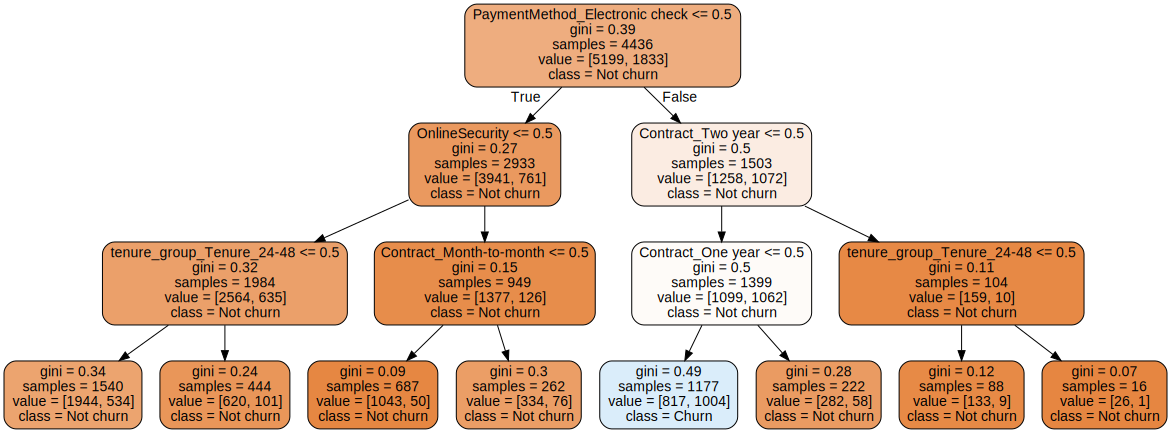

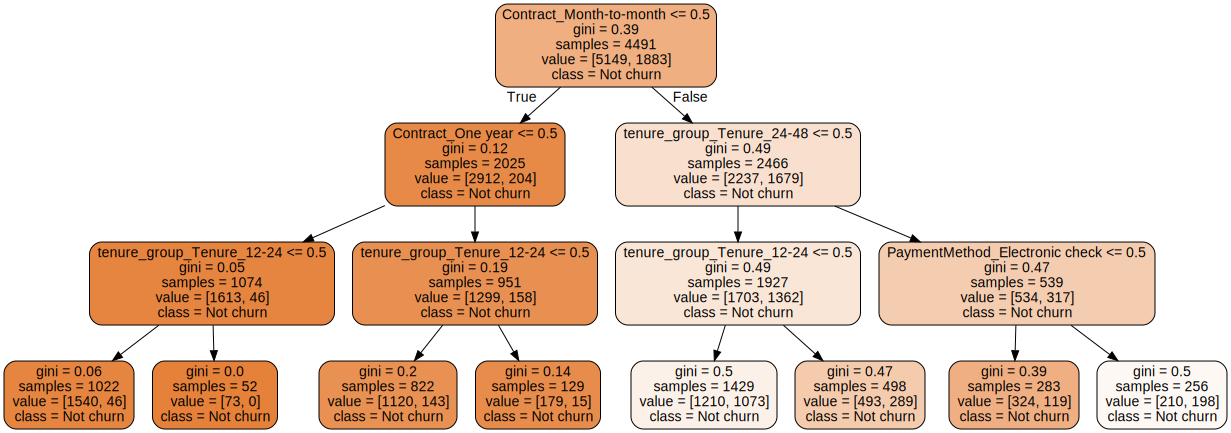

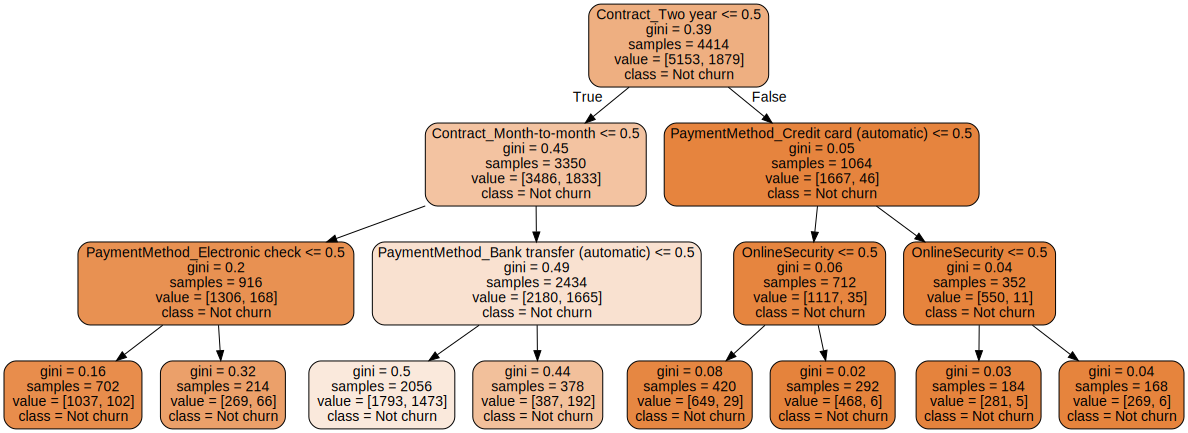

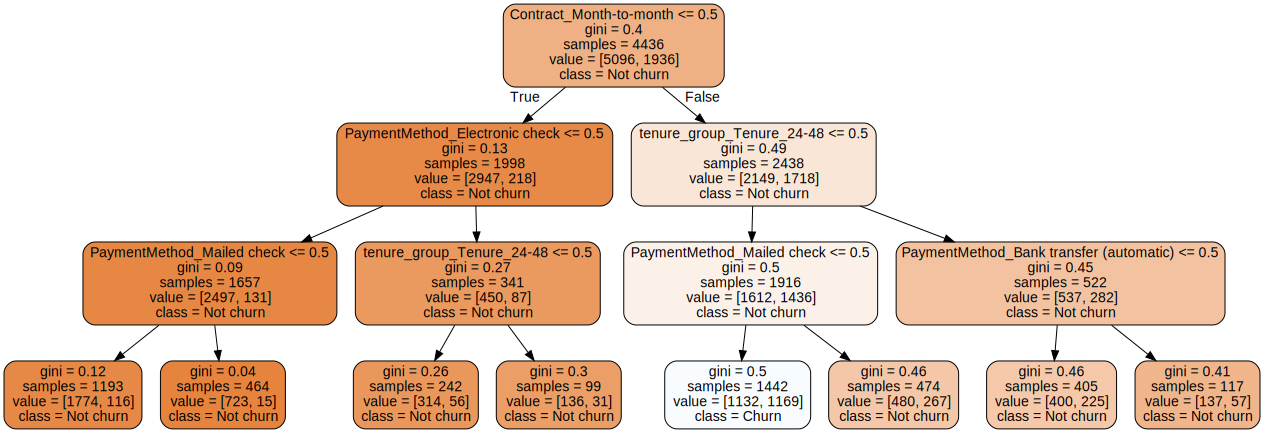

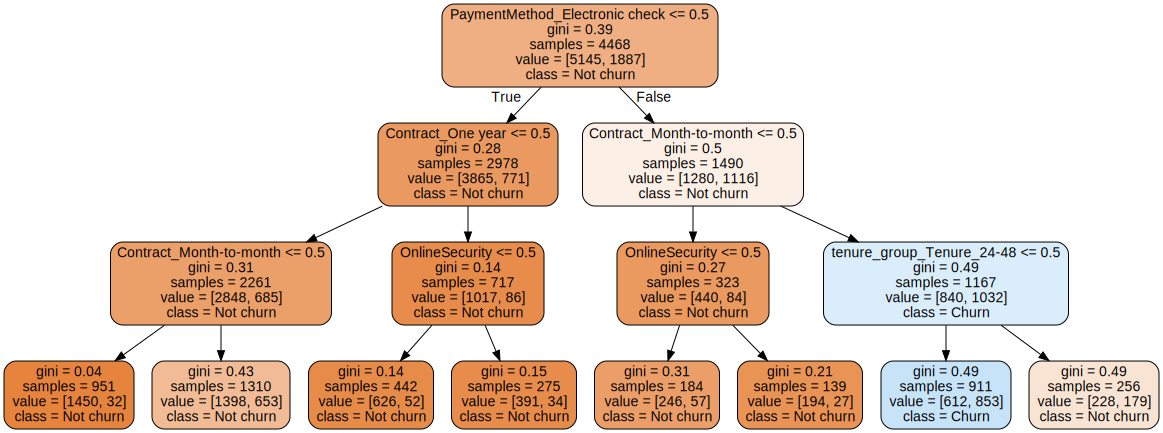

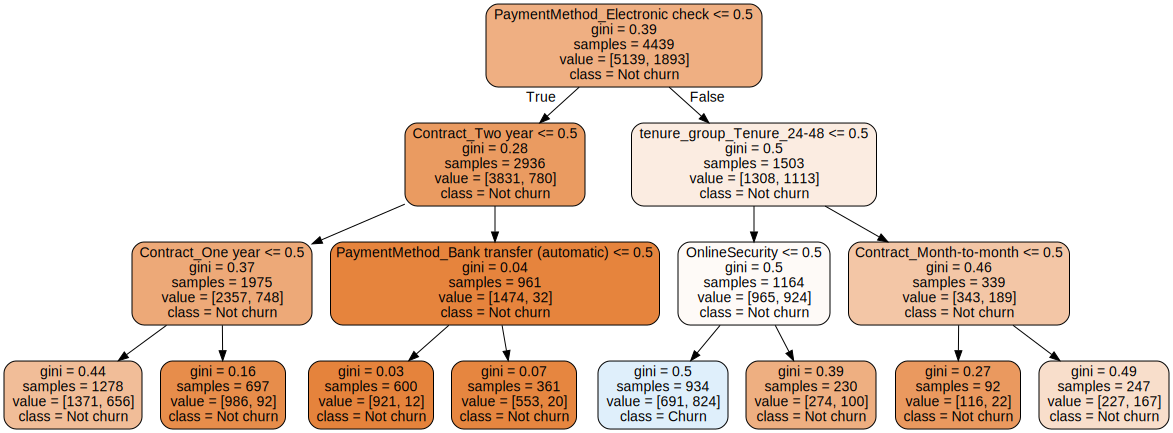

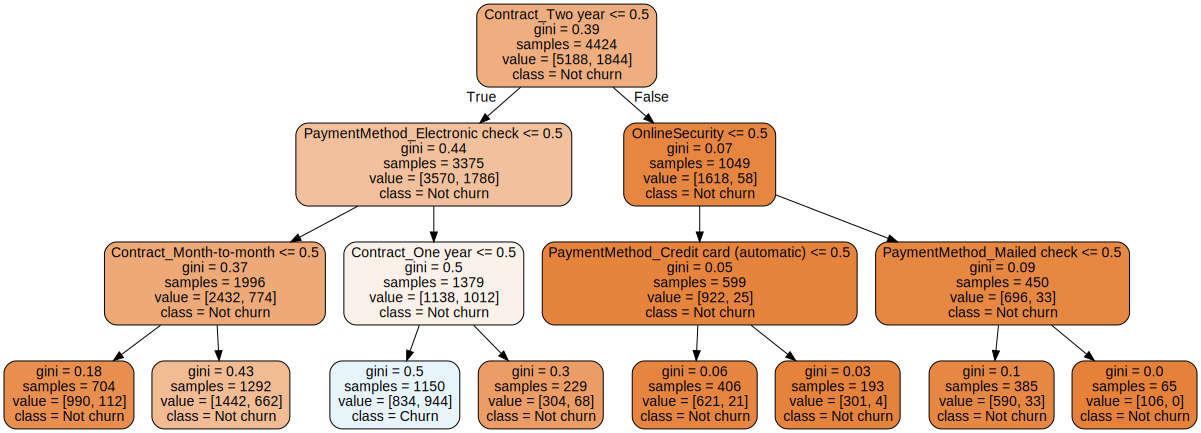

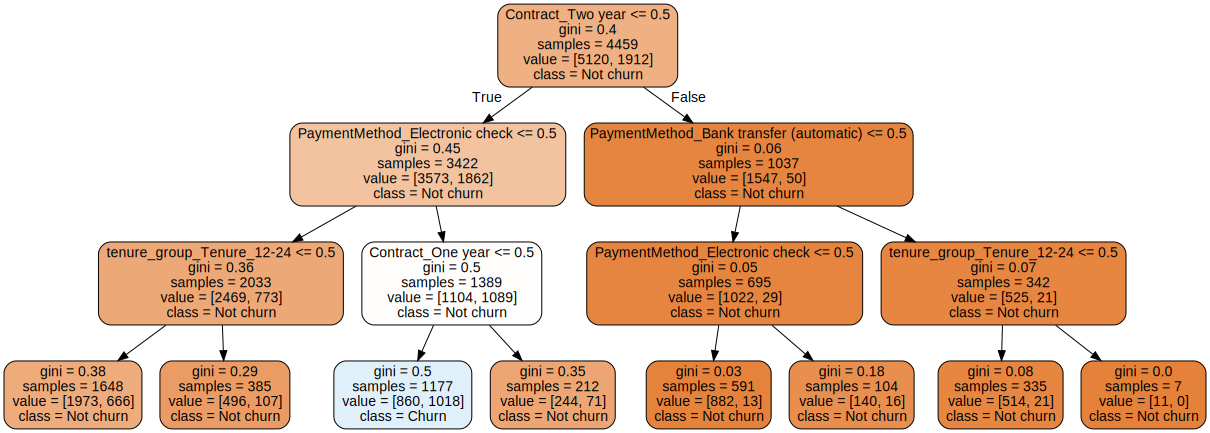

In [51]:
#making 10 trees with random forest for columns 
#selected from recursive feature elimination

n = np.arange(0,10).tolist()
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist() 
for i in n :
    plot_tree_randomforest(cols,10,i,3,"gini",model_performance=False)

### Gaussian Naive Bayes

GaussianNB()

 Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1268
           1       0.53      0.79      0.64       490

    accuracy                           0.75      1758
   macro avg       0.72      0.76      0.72      1758
weighted avg       0.80      0.75      0.76      1758

Accuracy Score   :  0.7491467576791809
Area under curve :  0.7628693748792892


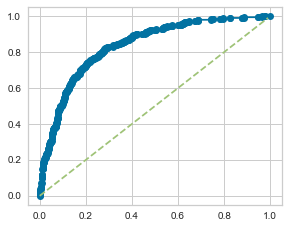

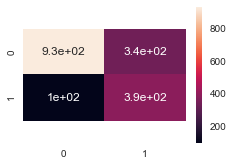

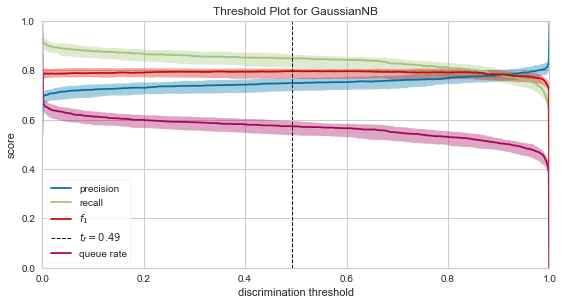

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)

telecom_churn_prediction_alg(gnb,os_smote_X,test_X,os_smote_y,test_y)

### Support Vector Machine
In this algorithm, we plot each data item as a point in n-dimensional space, where $n$ is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyperplane that differentiate the two classes

SVC(gamma=1.0, kernel='linear', probability=True)

 Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1268
           1       0.59      0.67      0.63       490

    accuracy                           0.78      1758
   macro avg       0.73      0.75      0.74      1758
weighted avg       0.79      0.78      0.78      1758

Accuracy score: 0.7792946530147895
Area under curve: 0.7468293311015258 



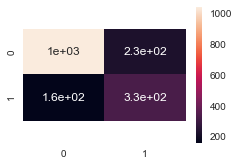

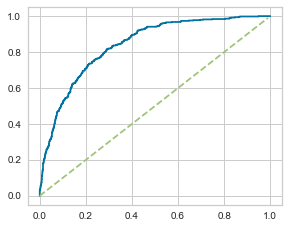

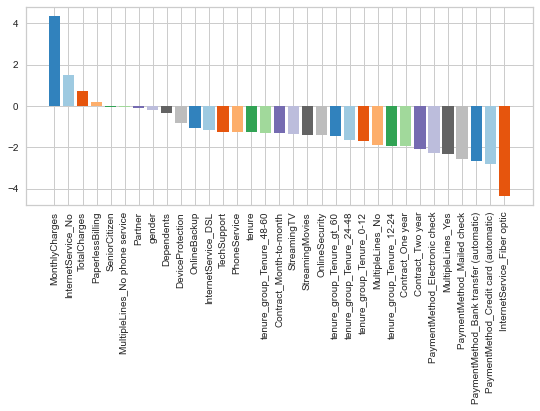

In [53]:
from sklearn.svm import SVC

#support vector classifier
#using linear hyperplane

svc_lin = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

cols = [x for x in df.columns if x not in id_col + label]

telecom_churn_prediction(svc_lin,os_smote_X,test_X,os_smote_y,test_y,
                         cols,'coefficient',threshold_plot = False)

### Tuning parameters for support vector machine

SVC(gamma=1.0, probability=True)

 Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1268
           1       0.58      0.50      0.53       490

    accuracy                           0.76      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.75      0.76      0.75      1758

Accuracy Score   :  0.7593856655290102
Area under curve :  0.6785585527586429


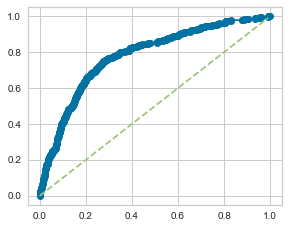

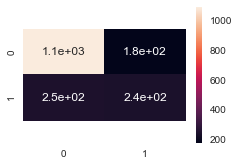

In [54]:
#tuning parameters
#Support vector classifier
#using non-linear hyper plane("rbf")

svc_rbf  = SVC(C=1.0, kernel='rbf', 
               degree= 3, gamma=1.0, 
               coef0=0.0, shrinking=True,
               probability=True,tol=0.001,
               cache_size=200, class_weight=None,
               verbose=False,max_iter= -1,
               random_state=None)

telecom_churn_prediction_alg(svc_rbf,os_smote_X,test_X,
                             os_smote_y,test_y,threshold_plot = False)

### LightGBMClassifier

LGBMClassifier(learning_rate=0.5, max_depth=7, num_leaves=500,
               objective='binary')

 Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1268
           1       0.57      0.56      0.56       490

    accuracy                           0.76      1758
   macro avg       0.70      0.70      0.70      1758
weighted avg       0.76      0.76      0.76      1758

Accuracy score: 0.7588168373151308
Area under curve: 0.697572909289899 



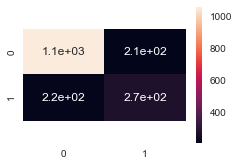

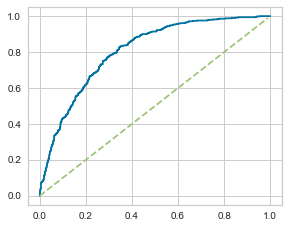

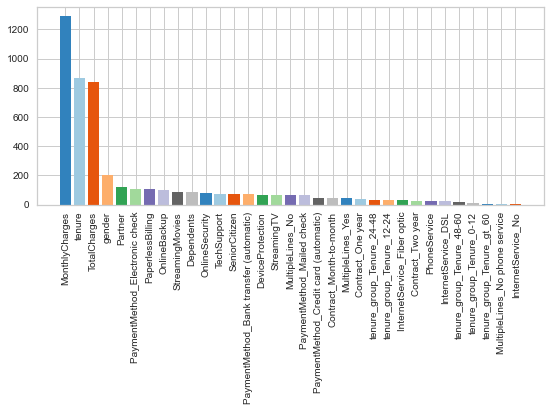

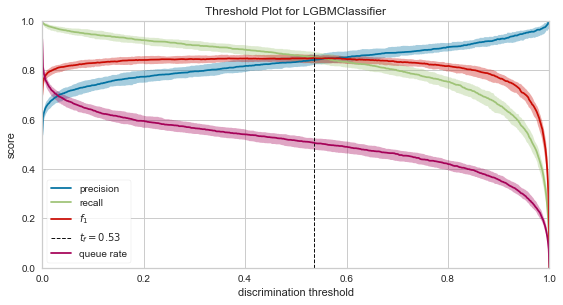

In [55]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

cols = [x for x in df.columns if x not in id_col + label]
telecom_churn_prediction(lgbm_c,os_smote_X,test_X,os_smote_y,test_y,
                         cols,'feature',threshold_plot = True)

### XGBoost Classifier

XGBClassifier(learning_rate=0.9, max_depth=7, silent=True)

 Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1268
           1       0.57      0.54      0.56       490

    accuracy                           0.76      1758
   macro avg       0.70      0.69      0.70      1758
weighted avg       0.76      0.76      0.76      1758

Accuracy score: 0.7605233219567691
Area under curve: 0.693747183415953 



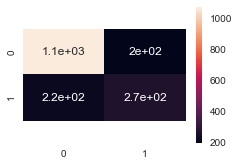

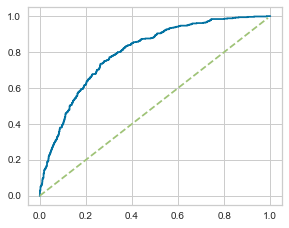

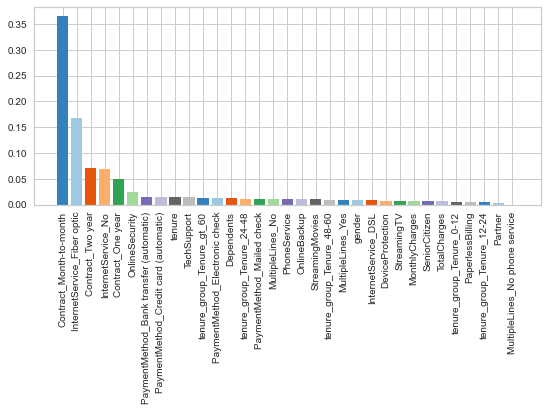

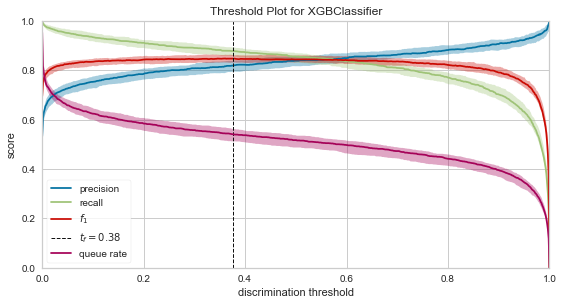

In [56]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


telecom_churn_prediction(xgc,os_smote_X,test_X,os_smote_y,test_y,
                         cols,'feature',threshold_plot = True)

## Model Performances

### Model Performance Metrics

In [57]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#function that gives model report in the form of dataframe
def model_report(model, training_X, testing_X, training_y, testing_y, name):
    model.fit(training_X, training_y)
    prediction = model.predict(testing_X)
    accuracy = accuracy_score(testing_y, prediction)
    recallscore = recall_score(testing_y, prediction)
    precision = precision_score(testing_y, prediction)
    roc_auc = roc_auc_score(testing_y, prediction)
    f1score = f1_score(testing_y, prediction)
    kappa_metric = cohen_kappa_score(testing_y, prediction)
    
    data_frame = pd.DataFrame({'Model': [name],
                               'Accuracy_score'  : [accuracy],
                               'Recall_score'    : [recallscore],
                               'Precision'       : [precision],
                               'f1_score'        : [f1score],
                               'Area_under_curve': [roc_auc],
                               'Kappa_metric'    : [kappa_metric]})
    return data_frame

In [58]:
#outputs for every model
model1 = model_report(logit,train_X,test_X,train_y,test_y,
                      "Logistic Regression(Baseline_model)")
model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_y,test_y,
                      "Logistic Regression(SMOTE)")
model3 = model_report(logit_rfe,train_rfe_X,test_rfe_X,train_rfe_y,test_rfe_y,
                      "Logistic Regression(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,train_X,test_X,train_y,test_y,
                      "Decision Tree")
model5 = model_report(knn,os_smote_X,test_X,os_smote_y,test_y,
                      "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model6 = model_report(rfc,train_X,test_X,train_y,test_y,
                      "Random Forest Classifier")
model7 = model_report(gnb,os_smote_X,test_X,os_smote_y,test_y,
                      "Naive Bayes")
model8 = model_report(svc_lin,os_smote_X,test_X,os_smote_y,test_y,
                      "SVM Classifier Linear")
model9 = model_report(svc_rbf,os_smote_X,test_X,os_smote_y,test_y,
                      "SVM Classifier RBF")
model10 = model_report(lgbm_c,os_smote_X,test_X,os_smote_y,test_y,
                      "LGBM Classifier")
model11 = model_report(xgc,os_smote_X,test_X,os_smote_y,test_y,
                      "XGBoost Classifier")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8,model9,
                                model10,model11],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

model_performances.head(12)

Model  Accuracy_score  Recall_score  \
0   Logistic Regression(Baseline_model)        0.798635      0.520408   
1            Logistic Regression(SMOTE)        0.779295      0.700000   
2              Logistic Regression(RFE)        0.713311      0.718367   
3                         Decision Tree        0.762230      0.455102   
4                        KNN Classifier        0.727531      0.685714   
5              Random Forest Classifier        0.795791      0.461224   
6                           Naive Bayes        0.749147      0.793878   
7                 SVM Classifier Linear        0.779295      0.673469   
8                    SVM Classifier RBF        0.759386      0.495918   
9                       LGBM Classifier        0.758817      0.559184   
10                   XGBoost Classifier        0.760523      0.542857   

    Precision  f1_score  Area_under_curve  Kappa_metric  
0    0.681818  0.590278          0.713280      0.459965  
1    0.587329  0.638734          0.754968      0.481594  
2    0.490251  0.582781          0.714862      0.376044  
3    0.596257  0.516204          0.668008      0.362332  
4    0.508321  0.583840          0.714703      0.387879  
5    0.704050  0.557337          0.693152      0.432014  
6    0.533608  0.638228          0.762869      0.457309  
7    0.591398  0.629771          0.746829      0.473500  
8    0.579952  0.534653          0.678559      0.373730  
9    0.568465  0.563786          0.697573      0.397135  
10   0.574514  0.558237          0.693747      0.394157

### Compare model metrics

In [59]:
model_performances= model_performances.set_index('Model')

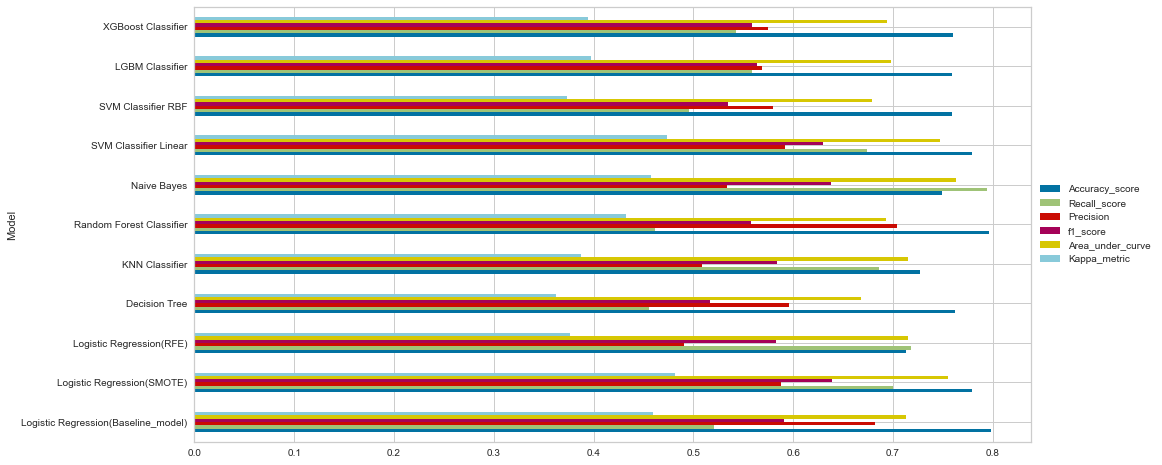

In [60]:
model_performances.plot(kind = 'barh', rot=0, figsize=(15,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Confusion matrices for models

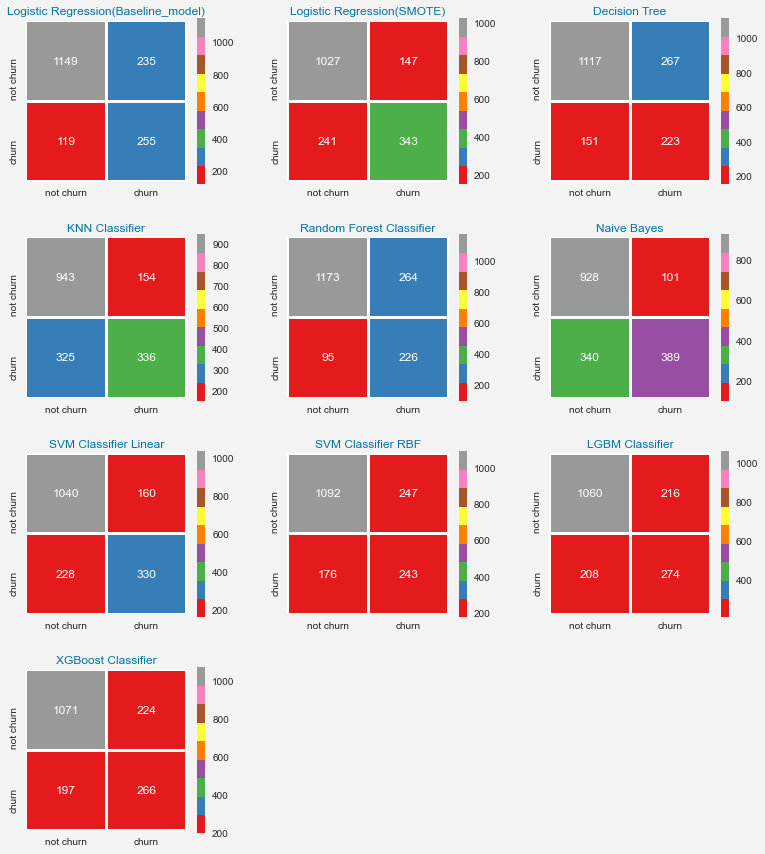

In [61]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']
fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(test_X)
    conf_matrix = confusion_matrix(predictions,test_y)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

### ROC - Curves for models

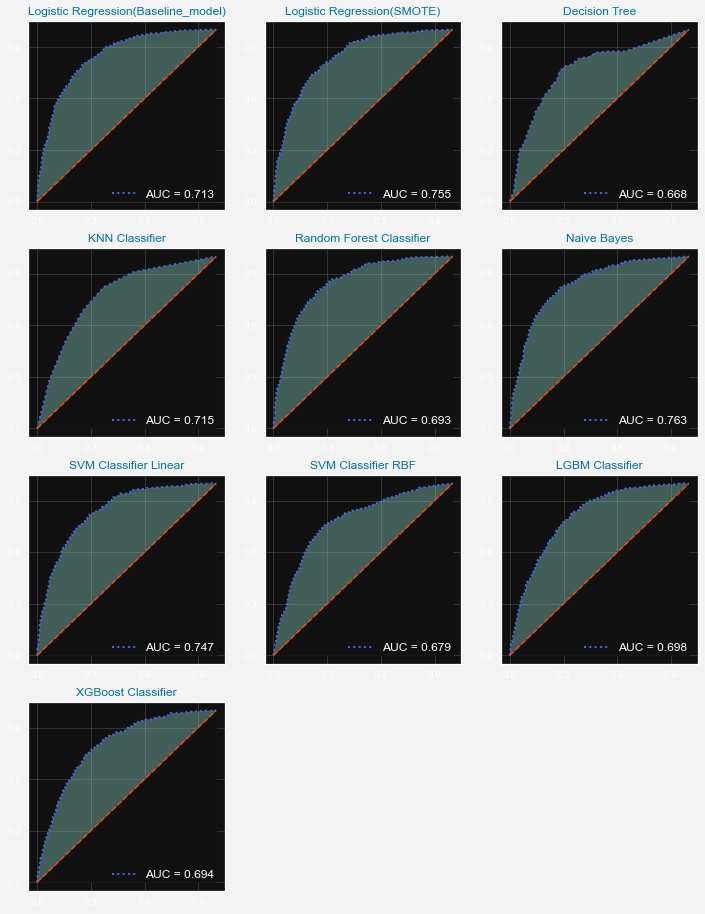

In [62]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    fpr,tpr,thresholds = roc_curve(test_y,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(test_y,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

### Precision recall curves

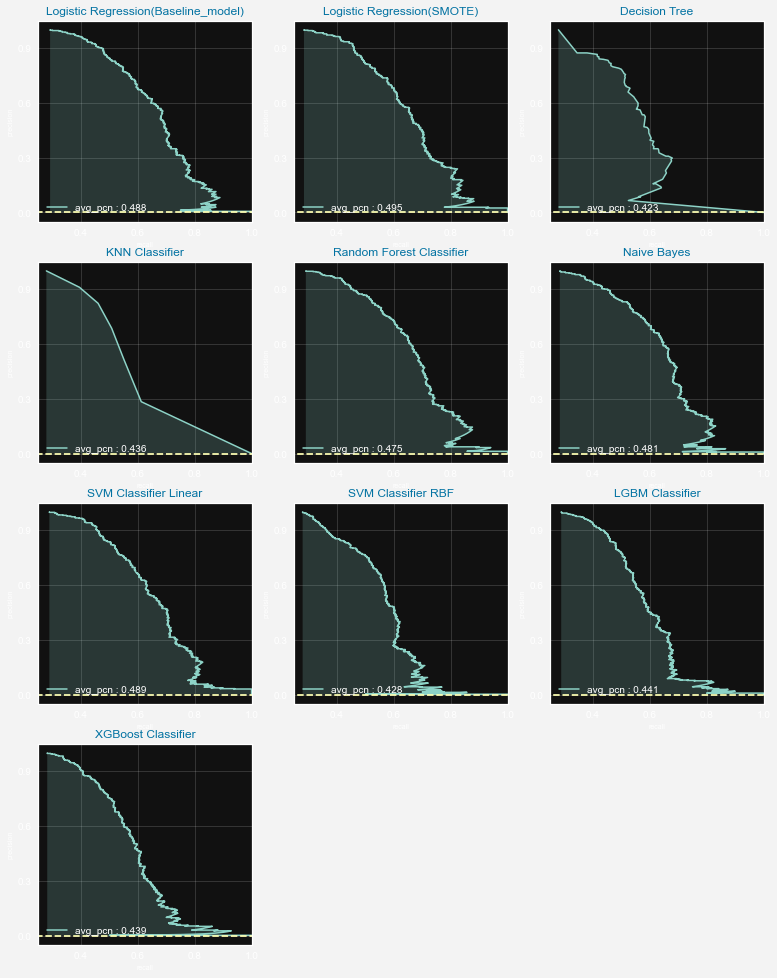

In [63]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    recall,precision,thresholds = precision_recall_curve(test_y,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(test_y,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))

SyntaxError: invalid syntax (<ipython-input-64-dae7e4ca3614>, line 1)